## Install Ultralytics

In [1]:
import ultralytics
# ultralytics.checks()

## Import Library

In [2]:
# import library

# from google.colab import drive
import shutil
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import torch
from ultralytics import YOLO

## Dataset

In [3]:
dataset = "D:/Caroline/Dataset Puddle no aug"

## Direktori

In [4]:
label_dir = os.path.join(dataset, 'labels')
image_dir = os.path.join(dataset, 'images')
subfolders = ['train', 'valid', 'test']

## Data Cleaning

In [5]:
# Clean up label files with wrong format
for subfolder in subfolders:
    for label_file in glob.glob(os.path.join(label_dir, subfolder, '*.txt')):
        with open(label_file, 'r') as file:
            lines = file.readlines()

        has_wrong_format = False
        for line in lines:
            points = line.strip().split()[1:]
            if len(points) < 6:
                has_wrong_format = True
                break

        if has_wrong_format:
            os.remove(label_file)
            print(f"Deleted label file: {label_file}")

            image_file = os.path.join(image_dir, subfolder, os.path.basename(label_file).replace('.txt', '.jpg'))
            if os.path.exists(image_file):
                os.remove(image_file)
                print(f"Deleted image file: {image_file}")

## Pemodelan
> Yolov11 Segmentasi



In [6]:
model_n = YOLO("yolo11n-seg.pt")

## Train Data
> 100 epochs

In [7]:
results_n = model_n.train(data="D:/caroline/Dataset Puddle no aug/data.yaml", epochs=300)

Ultralytics 8.3.95  Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=D:/caroline/Dataset Puddle no aug/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

train: Scanning D:\Caroline\Dataset Puddle no aug\train\labels.cache... 1684 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1684/1684 [00:00<?, ?it/s]

train: WARNING  D:\Caroline\Dataset Puddle no aug\train\images\image1320_jpeg_jpg.rf.bf66e0ce8f9ca12a1f5ca516b25e214f.jpg: 1 duplicate labels removed



val: Scanning D:\Caroline\Dataset Puddle no aug\valid\labels.cache... 483 images, 0 backgrounds, 0 corrupt: 100%|██████████| 483/483 [00:00<?, ?it/s]


Plotting labels to runs\segment\train9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train9
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/300      2.95G      1.468      3.052      2.374      1.574         15        640: 100%|██████████| 106/106 [00:13<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.06it/s]


                   all        483        694      0.445      0.401       0.39      0.177      0.488      0.393      0.382      0.144

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/300      3.53G      1.509       2.68      1.884      1.576         18        640: 100%|██████████| 106/106 [00:11<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.48it/s]

                   all        483        694      0.312      0.378      0.247      0.105      0.342      0.359      0.258      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/300      3.53G      1.564      2.602       1.77      1.606         14        640: 100%|██████████| 106/106 [00:11<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.11it/s]

                   all        483        694      0.492      0.507      0.453      0.194       0.51      0.493      0.458      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/300      3.53G      1.553      2.661      1.704      1.613         21        640: 100%|██████████| 106/106 [00:11<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.17it/s]

                   all        483        694      0.518      0.507      0.488      0.216      0.611      0.484      0.524       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/300      3.53G        1.5      2.583      1.591      1.572         11        640: 100%|██████████| 106/106 [00:11<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.79it/s]

                   all        483        694      0.584      0.559       0.58        0.3       0.62      0.566      0.595      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/300      3.53G      1.459      2.525      1.538      1.541         24        640: 100%|██████████| 106/106 [00:11<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.81it/s]

                   all        483        694      0.554      0.524      0.527      0.263       0.59      0.445      0.484      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/300      3.53G      1.419      2.407      1.453      1.509          9        640: 100%|██████████| 106/106 [00:11<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.59it/s]

                   all        483        694      0.713      0.602      0.655      0.351      0.726      0.611      0.664       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/300      3.53G      1.396       2.38      1.397      1.488         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]


                   all        483        694      0.654      0.641      0.664      0.349      0.661      0.644       0.67       0.37

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/300      3.53G      1.355      2.342      1.356      1.459         13        640: 100%|██████████| 106/106 [00:10<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.98it/s]

                   all        483        694      0.738       0.58      0.676      0.367      0.758      0.595      0.689       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/300      3.53G      1.359      2.367      1.376      1.466         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.03it/s]

                   all        483        694      0.729      0.628      0.707       0.38      0.752      0.612      0.695      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/300      3.53G      1.343      2.349      1.348      1.454         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]

                   all        483        694      0.623      0.586      0.605      0.319      0.683      0.586      0.617      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/300      3.53G      1.323      2.255      1.291       1.45         12        640: 100%|██████████| 106/106 [00:11<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]

                   all        483        694      0.792      0.676      0.774      0.453      0.819      0.689      0.788      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/300      3.53G      1.314      2.306      1.317      1.443          8        640: 100%|██████████| 106/106 [00:10<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.08it/s]


                   all        483        694       0.73      0.638      0.718      0.399      0.763      0.663      0.755      0.417

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/300      3.53G      1.292      2.293      1.271      1.428         12        640: 100%|██████████| 106/106 [00:10<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]


                   all        483        694      0.724      0.621      0.685       0.38      0.734      0.619      0.682      0.367

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/300      3.53G      1.298      2.254      1.272      1.427         21        640: 100%|██████████| 106/106 [00:10<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.98it/s]

                   all        483        694      0.738      0.715      0.756      0.447      0.763      0.725      0.767      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/300      3.53G      1.293      2.206      1.231      1.414         19        640: 100%|██████████| 106/106 [00:10<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.98it/s]

                   all        483        694      0.764      0.666      0.745       0.42      0.772      0.674       0.74      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/300      3.53G      1.279      2.222      1.237      1.416          9        640: 100%|██████████| 106/106 [00:10<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.84it/s]

                   all        483        694      0.793      0.634      0.747      0.442      0.789      0.664      0.753      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/300      3.53G      1.288      2.207      1.235      1.425         12        640: 100%|██████████| 106/106 [00:10<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.89it/s]


                   all        483        694      0.755      0.628      0.692      0.389       0.75      0.631       0.69      0.376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/300      3.53G      1.247      2.156       1.18      1.393          5        640: 100%|██████████| 106/106 [00:10<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]


                   all        483        694      0.773      0.674      0.754      0.448      0.789      0.682      0.768      0.442

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/300      3.53G      1.266      2.188      1.224      1.412         10        640: 100%|██████████| 106/106 [00:11<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]

                   all        483        694       0.75      0.659      0.753      0.439      0.771      0.673      0.759       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/300      3.53G      1.252      2.146      1.181      1.388         15        640: 100%|██████████| 106/106 [00:10<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.65it/s]

                   all        483        694      0.747      0.662       0.74      0.434      0.772       0.63      0.738      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/300      3.53G      1.236      2.113      1.161       1.38         17        640: 100%|██████████| 106/106 [00:11<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.01it/s]

                   all        483        694      0.795      0.665      0.759       0.44      0.806      0.678       0.77      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/300      3.53G      1.222       2.11      1.144      1.376         13        640: 100%|██████████| 106/106 [00:10<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.86it/s]

                   all        483        694      0.758      0.702      0.773      0.474      0.773      0.718       0.79      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/300      3.53G      1.224      2.143      1.151      1.363         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.75it/s]

                   all        483        694      0.734      0.605      0.699      0.393      0.762      0.621      0.721      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/300      3.53G      1.223       2.13      1.132      1.357         13        640: 100%|██████████| 106/106 [00:11<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.06it/s]

                   all        483        694      0.756      0.672      0.757      0.454      0.777      0.674      0.772      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/300      3.53G      1.194       2.07      1.107      1.348         20        640: 100%|██████████| 106/106 [00:10<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.13it/s]

                   all        483        694      0.789      0.692      0.786      0.482      0.806      0.703        0.8      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/300      3.53G      1.205       2.06      1.105      1.356         10        640: 100%|██████████| 106/106 [00:11<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.78it/s]


                   all        483        694      0.769      0.679      0.759      0.458      0.782       0.69      0.765      0.448

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/300      3.53G      1.202      2.072      1.106      1.344         14        640: 100%|██████████| 106/106 [00:11<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]

                   all        483        694      0.776      0.646      0.742      0.445      0.789      0.663      0.759      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/300      3.53G      1.192      2.052      1.075      1.337          9        640: 100%|██████████| 106/106 [00:11<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.86it/s]

                   all        483        694      0.797      0.709      0.777      0.471      0.804      0.715      0.777      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/300      3.53G      1.179       2.05      1.086      1.345         12        640: 100%|██████████| 106/106 [00:11<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.29it/s]

                   all        483        694      0.799      0.703      0.807      0.506      0.826      0.715      0.814      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/300      3.53G      1.182      2.032      1.077      1.345         11        640: 100%|██████████| 106/106 [00:11<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.49it/s]

                   all        483        694      0.769      0.728       0.79       0.46      0.762      0.757      0.807      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/300      3.53G      1.183      2.043      1.088      1.346          6        640: 100%|██████████| 106/106 [00:10<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.57it/s]

                   all        483        694       0.81      0.632      0.748      0.455      0.835      0.649      0.765      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/300      3.53G      1.154      2.005      1.039      1.331         13        640: 100%|██████████| 106/106 [00:11<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.63it/s]

                   all        483        694      0.733        0.7      0.743      0.458      0.772      0.722      0.774      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/300      3.53G      1.174      2.006      1.052      1.331         13        640: 100%|██████████| 106/106 [00:10<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]

                   all        483        694      0.808      0.685      0.766      0.459      0.817      0.689      0.786       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/300      3.53G      1.164      1.995      1.032      1.326         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.24it/s]

                   all        483        694      0.829      0.719      0.823       0.52       0.83      0.719       0.82      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/300      3.53G      1.152      2.013      1.039      1.328          8        640: 100%|██████████| 106/106 [00:10<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.34it/s]


                   all        483        694      0.818      0.686      0.802      0.488      0.804      0.695      0.803      0.483

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/300      3.53G      1.164      2.019      1.023      1.334         10        640: 100%|██████████| 106/106 [00:10<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.37it/s]

                   all        483        694      0.821      0.705      0.809      0.487      0.827      0.728      0.817      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/300      3.53G       1.16       1.99      1.004      1.323         11        640: 100%|██████████| 106/106 [00:11<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.90it/s]

                   all        483        694      0.802      0.733      0.801      0.502      0.818      0.751      0.817      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/300      3.53G      1.141      2.021      1.035      1.311         13        640: 100%|██████████| 106/106 [00:11<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.09it/s]

                   all        483        694      0.797      0.729      0.814      0.511      0.806      0.722      0.809      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/300      3.53G      1.134      1.963      1.004      1.311         11        640: 100%|██████████| 106/106 [00:12<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.58it/s]

                   all        483        694      0.804      0.732       0.82      0.523      0.819      0.745      0.828      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/300      3.53G      1.145      1.973      1.025      1.309         17        640: 100%|██████████| 106/106 [00:11<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.81it/s]

                   all        483        694      0.794      0.733       0.81      0.502      0.811      0.749      0.824      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/300      3.53G      1.119      1.939     0.9834      1.305          9        640: 100%|██████████| 106/106 [00:11<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

                   all        483        694      0.744      0.732      0.776      0.474      0.777      0.683      0.772      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/300      3.53G       1.12      1.956     0.9853      1.298         13        640: 100%|██████████| 106/106 [00:11<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]


                   all        483        694      0.795      0.719      0.813      0.509      0.809      0.739      0.828      0.512

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/300      3.53G      1.108      1.931     0.9505      1.283         10        640: 100%|██████████| 106/106 [00:11<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.83it/s]

                   all        483        694      0.742      0.673       0.75      0.467      0.747      0.677      0.746      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/300      3.53G      1.145      1.965      1.009        1.3         11        640: 100%|██████████| 106/106 [00:11<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]

                   all        483        694      0.826      0.724      0.822      0.515      0.839      0.735      0.826      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/300      3.53G      1.128      1.931     0.9827      1.295          7        640: 100%|██████████| 106/106 [00:11<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.67it/s]

                   all        483        694      0.835      0.708      0.822      0.536      0.852      0.718      0.829      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/300      3.53G      1.109      1.941     0.9771      1.294         13        640: 100%|██████████| 106/106 [00:11<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.84it/s]


                   all        483        694      0.841      0.707      0.815      0.508      0.861      0.723      0.834      0.507

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/300      3.53G      1.125      1.964     0.9992      1.298         15        640: 100%|██████████| 106/106 [00:10<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.47it/s]

                   all        483        694       0.82       0.71      0.817      0.524      0.817      0.705      0.811      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/300      3.53G      1.113      1.932     0.9625      1.291         16        640: 100%|██████████| 106/106 [00:11<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.76it/s]

                   all        483        694      0.792      0.722      0.775      0.487      0.789      0.726      0.778      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/300      3.53G      1.114      1.904     0.9674      1.291         13        640: 100%|██████████| 106/106 [00:11<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.93it/s]


                   all        483        694      0.824      0.741      0.839      0.531      0.832      0.757      0.849      0.522

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/300      3.53G      1.108      1.915      0.976      1.287         10        640: 100%|██████████| 106/106 [00:11<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.54it/s]

                   all        483        694      0.804      0.731      0.816      0.507      0.847      0.726      0.821      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/300      3.53G      1.107      1.894     0.9487      1.278         18        640: 100%|██████████| 106/106 [00:11<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]

                   all        483        694      0.822      0.719      0.822      0.511      0.837      0.732      0.835      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/300      3.53G      1.087      1.905     0.9251      1.277         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.26it/s]

                   all        483        694      0.813      0.762      0.838      0.549      0.824      0.772      0.839       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/300      3.53G      1.093      1.869     0.9383      1.261         14        640: 100%|██████████| 106/106 [00:11<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.51it/s]

                   all        483        694      0.831        0.7       0.82      0.527      0.864      0.682      0.821      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/300      3.53G      1.093      1.916     0.9451       1.29          5        640: 100%|██████████| 106/106 [00:11<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.63it/s]

                   all        483        694      0.846      0.732      0.838      0.533      0.835      0.752      0.833      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/300      3.53G      1.084      1.885       0.95      1.278         14        640: 100%|██████████| 106/106 [00:11<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.46it/s]

                   all        483        694      0.823      0.709      0.811      0.522      0.852      0.721      0.825      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/300      3.53G      1.093      1.889     0.9493      1.279         13        640: 100%|██████████| 106/106 [00:14<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.01it/s]

                   all        483        694      0.781      0.734      0.799      0.506       0.82      0.754      0.823       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/300      3.53G      1.087      1.897     0.9362      1.272         15        640: 100%|██████████| 106/106 [00:19<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.845      0.761      0.847      0.548      0.856      0.769       0.85      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/300      3.53G      1.069      1.814     0.9004      1.265         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.857      0.762      0.861      0.554      0.867      0.771      0.869      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/300      3.53G      1.091      1.866     0.9201      1.287         12        640: 100%|██████████| 106/106 [00:18<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]

                   all        483        694      0.803      0.757      0.824      0.516      0.824      0.755      0.818      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/300      3.53G      1.073      1.858     0.9371      1.262         17        640: 100%|██████████| 106/106 [00:18<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]

                   all        483        694      0.832      0.736      0.836       0.54      0.859      0.759      0.853      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/300      3.53G      1.084      1.879     0.8934      1.276         14        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]

                   all        483        694      0.799      0.735      0.828      0.528      0.775      0.761      0.826      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/300      3.53G      1.057      1.814     0.8981      1.257         18        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.859      0.739      0.843      0.548      0.862      0.752      0.851      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/300      3.53G      1.082      1.858     0.9176      1.272         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]

                   all        483        694      0.854      0.744      0.858      0.559      0.873      0.755      0.865      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/300      3.53G      1.075      1.859     0.9114      1.261         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        483        694       0.82      0.728      0.818      0.528      0.834      0.747      0.832      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/300      3.53G      1.071      1.856     0.8888      1.247          7        640: 100%|██████████| 106/106 [00:18<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]

                   all        483        694      0.826      0.746      0.829      0.541      0.826      0.758      0.833      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/300      3.53G      1.062      1.819     0.8839      1.248         18        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.823      0.749      0.836      0.553      0.836      0.757      0.848      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/300      3.53G      1.056      1.856     0.8791      1.251         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]

                   all        483        694      0.843      0.756      0.849      0.555      0.854      0.772      0.856      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/300      3.53G      1.038      1.818     0.8674      1.241         14        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        483        694      0.852      0.761      0.853      0.557      0.867       0.78      0.862       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/300      3.53G      1.042      1.819     0.8843      1.243         13        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        483        694      0.849      0.751      0.842      0.547      0.854      0.758      0.846      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/300      3.53G      1.055      1.839      0.881       1.26          8        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]

                   all        483        694      0.854      0.744      0.845      0.562      0.889      0.754      0.861      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/300      3.53G      1.058      1.815     0.8892      1.259          7        640: 100%|██████████| 106/106 [00:18<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]

                   all        483        694      0.824      0.756      0.838      0.543      0.844      0.774      0.848      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/300      3.53G      1.045       1.79     0.8679      1.238         18        640: 100%|██████████| 106/106 [00:18<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.36it/s]

                   all        483        694      0.825      0.749      0.836      0.532      0.845      0.767      0.853      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/300      3.53G      1.044      1.789     0.8687      1.237          6        640: 100%|██████████| 106/106 [00:18<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]

                   all        483        694      0.865      0.718      0.825      0.543      0.877      0.722      0.829      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/300      3.53G      1.052      1.805     0.8799      1.247         12        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        483        694      0.804      0.772      0.841      0.552      0.818      0.784      0.854      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/300      3.53G      1.028        1.8     0.8533      1.239         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]

                   all        483        694      0.856      0.738      0.847      0.559      0.864      0.742      0.848      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/300      3.53G       1.04      1.792     0.8462      1.233         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694      0.816      0.779      0.855      0.557      0.863       0.77       0.87      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/300      3.53G      1.021      1.791     0.8451      1.235         14        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]

                   all        483        694      0.835      0.782      0.855      0.563      0.842      0.793      0.862      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/300      3.53G      1.042      1.811     0.8619      1.237         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]

                   all        483        694      0.816      0.769      0.844      0.546       0.82      0.772      0.845      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/300      3.53G      1.025      1.785     0.8495      1.223         13        640: 100%|██████████| 106/106 [00:18<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.823      0.793      0.867      0.571      0.852      0.781      0.871      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/300      3.53G      1.013      1.758     0.8409      1.219         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]

                   all        483        694      0.837      0.772      0.857      0.561      0.878      0.758      0.868      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/300      3.53G       1.02      1.753     0.8274      1.226          9        640: 100%|██████████| 106/106 [00:18<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.862      0.735      0.856      0.566      0.879      0.758      0.865      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/300      3.53G      1.003      1.771     0.8157      1.224         12        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]

                   all        483        694      0.847      0.761      0.861      0.563      0.862      0.773      0.872      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/300      3.53G     0.9917       1.76      0.818      1.217         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694      0.857      0.777       0.87      0.574       0.85      0.798      0.876      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/300      3.53G      1.005      1.776     0.8217      1.214         17        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]

                   all        483        694      0.875      0.735      0.855      0.564      0.881      0.739       0.86       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/300      3.53G     0.9921      1.748     0.8294      1.202         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]

                   all        483        694       0.86      0.756      0.856      0.565      0.877       0.77      0.866      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/300      3.53G      1.007      1.746     0.8316      1.212         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.833      0.777      0.852      0.554      0.844      0.787      0.863      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/300      3.53G      1.013      1.765      0.842      1.216         20        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.31it/s]

                   all        483        694      0.841      0.769      0.851      0.571      0.863      0.768      0.864      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/300      3.53G     0.9919      1.744     0.8092      1.203         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]

                   all        483        694      0.819      0.797       0.86      0.584      0.854      0.772      0.867      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/300      3.53G     0.9806      1.716     0.8001      1.202          6        640: 100%|██████████| 106/106 [00:18<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]

                   all        483        694      0.843      0.787       0.86      0.552       0.86        0.8      0.876      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/300      3.53G      1.024      1.769     0.8277      1.222         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]

                   all        483        694      0.818      0.758       0.85      0.546      0.833      0.771      0.862      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/300      3.53G      1.003      1.719      0.817      1.204         19        640: 100%|██████████| 106/106 [00:18<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694       0.86      0.751      0.851       0.56      0.877      0.777      0.867      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/300      3.53G          1      1.746     0.8152      1.215         16        640: 100%|██████████| 106/106 [00:18<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]

                   all        483        694      0.838      0.788      0.871       0.58      0.844      0.801      0.876      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/300      3.53G     0.9837      1.719     0.8159      1.211         12        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

                   all        483        694      0.838       0.76      0.836      0.551      0.857      0.769      0.853      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/300      3.53G      1.004      1.732     0.7989       1.21         18        640: 100%|██████████| 106/106 [00:18<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]

                   all        483        694      0.853      0.746      0.858      0.563       0.83      0.787      0.867       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/300      3.53G     0.9833      1.754     0.8074        1.2         19        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        483        694      0.868       0.74      0.854      0.557      0.885      0.754       0.87      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/300      3.53G     0.9888      1.707     0.7887      1.216         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        483        694      0.846      0.769      0.855      0.568      0.847      0.794      0.872       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/300      3.53G     0.9766      1.709     0.7718      1.196         16        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.841      0.788      0.869      0.593      0.841      0.788      0.873      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/300      3.53G     0.9959      1.708     0.7888      1.212         22        640: 100%|██████████| 106/106 [00:18<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694      0.817      0.755      0.826      0.532      0.848      0.762      0.842      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/300      3.53G     0.9891      1.716     0.7822      1.206         13        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694      0.844      0.774      0.862      0.574      0.865      0.784      0.879      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/300      3.53G     0.9837      1.693     0.7896      1.199         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        483        694      0.867      0.787      0.875      0.588       0.88      0.798      0.888      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/300      3.53G      1.001      1.702     0.7859      1.201         17        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        483        694      0.841      0.755      0.851      0.553      0.852      0.765      0.865      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/300      3.53G     0.9812      1.715     0.7857      1.199         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.859      0.725      0.829      0.545      0.868      0.765       0.85      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/300      3.53G     0.9861      1.711     0.7855      1.196         22        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]

                   all        483        694      0.859      0.773       0.87      0.574      0.874      0.787      0.879      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/300      3.53G     0.9604      1.674     0.7579      1.183         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        483        694      0.867      0.778      0.878      0.597      0.881      0.781      0.877      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/300      3.53G     0.9489      1.659     0.7617      1.171         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        483        694      0.886      0.759      0.868      0.569      0.891      0.763      0.872      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/300      3.53G     0.9552      1.671     0.7615      1.185         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.872      0.758       0.87      0.591       0.88       0.77      0.875      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/300      3.53G     0.9625      1.669     0.7692      1.184         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        483        694      0.872      0.775      0.865      0.588      0.884      0.784      0.872      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/300      3.53G     0.9452       1.66     0.7429       1.17          9        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]

                   all        483        694      0.878      0.771      0.874      0.593      0.869      0.782      0.875      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/300      3.53G      0.955      1.679     0.7554      1.182         14        640: 100%|██████████| 106/106 [00:18<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.851       0.79      0.869      0.586      0.872      0.797       0.88      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/300      3.53G     0.9402      1.644     0.7206      1.179         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]

                   all        483        694      0.869      0.768      0.862      0.584      0.891      0.777      0.865      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/300      3.53G     0.9642      1.696     0.7577      1.184         20        640: 100%|██████████| 106/106 [00:18<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

                   all        483        694      0.823      0.808      0.868      0.588      0.855      0.798      0.879       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/300      3.53G     0.9446      1.656     0.7446      1.172         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

                   all        483        694      0.872      0.795      0.874      0.599       0.88      0.802       0.88      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/300      3.53G     0.9368      1.653     0.7249      1.174         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.865      0.785      0.874      0.598       0.87      0.795       0.88      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/300      3.53G     0.9521      1.656     0.7333       1.17         16        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        483        694      0.847      0.798      0.872      0.594      0.863      0.825      0.892      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/300      3.53G     0.9609      1.649     0.7527      1.179          7        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.885      0.768      0.877      0.592      0.876      0.785      0.876       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/300      3.53G     0.9402      1.672      0.729      1.168         19        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.861      0.788      0.873      0.597      0.872      0.798      0.884      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/300      3.53G     0.9463      1.654     0.7382      1.172         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        483        694      0.878      0.782      0.876      0.602      0.886      0.791      0.882      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/300      3.53G     0.9507      1.655     0.7447      1.174         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.852      0.794      0.878        0.6      0.866      0.808      0.885      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/300      3.53G     0.9204      1.629     0.7192      1.159         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694       0.87      0.801      0.875       0.59      0.879      0.811      0.885      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/300      3.53G      0.936      1.634     0.7293      1.167          8        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        483        694      0.867      0.753       0.85       0.57      0.896      0.774      0.872      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/300      3.53G     0.9173      1.613     0.7105      1.149         12        640: 100%|██████████| 106/106 [00:18<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694       0.88      0.768      0.871      0.597      0.891       0.78      0.882      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/300      3.53G     0.9375      1.647     0.7178      1.164          7        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.836      0.798      0.857      0.579      0.859      0.807      0.872      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/300      3.53G     0.9242      1.597     0.7194      1.157         16        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.869      0.788      0.868      0.581      0.882      0.795      0.879      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/300      3.53G     0.9474      1.676     0.7332      1.177         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]

                   all        483        694       0.88       0.79      0.872       0.59      0.897      0.794      0.879      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/300      3.53G     0.9205      1.644     0.7011      1.154         20        640: 100%|██████████| 106/106 [00:18<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]

                   all        483        694      0.862      0.793      0.872      0.594      0.872      0.801      0.882      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/300      3.53G     0.9335      1.606      0.705      1.154          9        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.863      0.778      0.881      0.594      0.875      0.795      0.882      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/300      3.53G     0.9281      1.632     0.7019       1.16         16        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.902      0.764      0.875      0.603      0.912      0.777      0.883      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/300      3.53G     0.9082      1.582     0.6857      1.148         18        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694       0.87      0.783      0.867      0.593      0.885      0.796       0.88      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/300      3.53G     0.9337      1.622      0.701      1.164          9        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        483        694      0.851      0.791      0.867      0.589      0.865      0.804      0.875      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/300      3.53G     0.9026      1.611     0.6958      1.147         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        483        694      0.856      0.772      0.859      0.591      0.861      0.797      0.876      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/300      3.53G     0.9076      1.578     0.6784      1.143         12        640: 100%|██████████| 106/106 [00:18<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.851      0.771      0.858      0.595      0.873      0.787      0.878      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/300      3.53G     0.9103      1.607     0.6896      1.145         14        640: 100%|██████████| 106/106 [00:18<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        483        694      0.848      0.791      0.866      0.595      0.861      0.803      0.872      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/300      3.53G     0.9059      1.591     0.6945       1.15         18        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.879      0.778      0.883      0.607      0.878      0.807       0.89      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/300      3.53G      0.909      1.601      0.699      1.149         16        640: 100%|██████████| 106/106 [00:18<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        483        694      0.846      0.784      0.868      0.596      0.857      0.794      0.876      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/300      3.53G     0.9055      1.595     0.6783      1.141         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694       0.88      0.786      0.888      0.613       0.89      0.794      0.891      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/300      3.53G     0.9096       1.59     0.6825      1.146         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        483        694      0.864      0.799      0.875      0.602      0.871      0.805      0.882      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/300      3.53G     0.8956        1.6     0.6793      1.136         19        640: 100%|██████████| 106/106 [00:18<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.888      0.777      0.871      0.596      0.892      0.795      0.883      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/300      3.53G     0.8968      1.615     0.6805      1.146         14        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.854      0.782      0.866      0.589      0.866      0.801      0.882      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/300      3.53G     0.8989      1.573     0.6791      1.142          9        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.848      0.821       0.88      0.601      0.862      0.835      0.893      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/300      3.53G     0.8837       1.58     0.6512      1.131         17        640: 100%|██████████| 106/106 [00:18<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.855      0.806      0.873      0.596      0.868      0.811      0.882      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/300      3.53G     0.8858      1.589     0.6682      1.138         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694       0.84      0.808      0.876      0.604      0.858      0.817      0.893      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/300      3.53G     0.8734      1.581     0.6687      1.125         16        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.862      0.794      0.877      0.602      0.873        0.8      0.879      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/300      3.53G     0.8761      1.552      0.661      1.133         13        640: 100%|██████████| 106/106 [00:18<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

                   all        483        694      0.871      0.782      0.876      0.607      0.901       0.78      0.886      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/300      3.53G     0.8823      1.571     0.6668      1.126         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.876        0.8      0.886      0.611      0.881       0.81      0.887       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/300      3.53G     0.8914      1.582     0.6757      1.146         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694      0.869      0.803      0.878        0.6      0.882      0.814      0.887      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/300      3.53G     0.8902      1.558     0.6672      1.131          7        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        483        694      0.874      0.788      0.877      0.608      0.894      0.802      0.893       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/300      3.53G     0.8864      1.555     0.6555      1.138         16        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694      0.842      0.818      0.875      0.609       0.85      0.835      0.887      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/300      3.53G     0.8527      1.499     0.6291      1.106         14        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694      0.876      0.784      0.877      0.613      0.892      0.799      0.886      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/300      3.53G     0.8804      1.559     0.6507       1.13         14        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]

                   all        483        694      0.871      0.781      0.876      0.603      0.889      0.796      0.885      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/300      3.53G     0.8736      1.541     0.6406      1.124         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.879      0.788      0.876       0.61      0.896      0.798      0.889      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/300      3.53G     0.8597      1.519      0.637      1.122         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

                   all        483        694      0.892      0.772      0.873      0.602      0.898      0.775      0.879      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/300      3.53G     0.8765      1.544     0.6558      1.131         16        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694       0.87      0.803      0.875        0.6      0.893      0.805      0.886      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/300      3.53G     0.8696      1.544     0.6476      1.133         17        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]

                   all        483        694      0.882      0.788      0.872      0.605      0.903      0.794      0.886      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/300      3.53G     0.8705      1.546     0.6508      1.119          9        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        483        694      0.882      0.781      0.878      0.601      0.901      0.798      0.888      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/300      3.53G     0.8552      1.521     0.6277      1.114         13        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694       0.87      0.824      0.882      0.605      0.885      0.836      0.897      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/300      3.53G     0.8563      1.547     0.6385      1.117         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        483        694      0.865      0.785      0.878      0.608      0.886       0.81      0.889      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/300      3.53G     0.8693      1.567     0.6502      1.118         16        640: 100%|██████████| 106/106 [00:18<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        483        694      0.871      0.788      0.873      0.605      0.889      0.804      0.887      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/300      3.53G     0.8563      1.509     0.6436      1.111         13        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]

                   all        483        694      0.838      0.797      0.867      0.604      0.849      0.807      0.874       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/300      3.53G     0.8546      1.531     0.6369      1.108         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]

                   all        483        694      0.871      0.819       0.88       0.61      0.875      0.831      0.885      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/300      3.53G     0.8474      1.511     0.6311       1.11         17        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694      0.871      0.778      0.861      0.597      0.884      0.793      0.874      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/300      3.53G      0.858      1.517     0.6295      1.125          9        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]

                   all        483        694      0.873      0.805      0.879      0.615      0.895      0.811       0.89      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/300      3.53G     0.8612      1.506      0.629      1.109         17        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694      0.858      0.808      0.883       0.62      0.869      0.813      0.886      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/300      3.53G      0.857      1.512     0.6191      1.118         15        640: 100%|██████████| 106/106 [00:18<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        483        694      0.895      0.795      0.889      0.619      0.906      0.804      0.889      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/300      3.53G     0.8539      1.516     0.6156      1.114         13        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694      0.857      0.808      0.883      0.613      0.874      0.821      0.888      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/300      3.53G     0.8467      1.489     0.6144      1.103         13        640: 100%|██████████| 106/106 [00:18<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694       0.88      0.805      0.884       0.62      0.893      0.806      0.888      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/300      3.53G     0.8468      1.498     0.6252      1.109         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.875        0.8      0.872      0.609       0.89      0.813      0.886      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/300      3.53G     0.8487      1.513     0.6271       1.11         14        640: 100%|██████████| 106/106 [00:18<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]

                   all        483        694      0.863      0.832      0.894      0.632      0.865       0.83      0.896      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/300      3.53G     0.8418      1.511     0.6116       1.11         11        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.868      0.807      0.879      0.619      0.878      0.816      0.883      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/300      3.53G      0.827      1.481      0.605      1.094         12        640: 100%|██████████| 106/106 [00:18<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        483        694      0.892      0.794      0.882      0.624      0.901      0.805      0.894      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/300      3.53G     0.8425      1.496     0.6173        1.1         19        640: 100%|██████████| 106/106 [00:18<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]

                   all        483        694      0.844      0.837      0.878      0.617      0.855      0.839      0.886      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/300      3.53G      0.826      1.482     0.6021      1.095         13        640: 100%|██████████| 106/106 [00:18<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        483        694      0.874      0.797      0.877      0.608      0.877      0.826      0.891       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/300      3.53G      0.845       1.52     0.6204      1.106         10        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        483        694      0.877       0.79      0.873      0.613      0.891      0.803      0.887      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/300      3.53G     0.8208      1.485     0.6039      1.096         16        640: 100%|██████████| 106/106 [00:18<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]

                   all        483        694      0.896      0.793      0.877      0.615      0.909      0.803      0.891      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/300      3.53G     0.8388      1.478     0.6056      1.098         10        640: 100%|██████████| 106/106 [00:14<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.23it/s]

                   all        483        694      0.871      0.818      0.882      0.622        0.9      0.811      0.887      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/300      3.53G     0.8222      1.479     0.6057      1.094         15        640: 100%|██████████| 106/106 [00:10<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]

                   all        483        694      0.847      0.811      0.874      0.618      0.862      0.826      0.882       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/300      3.53G     0.8219      1.471     0.5983      1.093         12        640: 100%|██████████| 106/106 [00:10<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]

                   all        483        694        0.9      0.805      0.893      0.628      0.904      0.824      0.901      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/300      3.53G     0.8094      1.477     0.6017       1.09         13        640: 100%|██████████| 106/106 [00:10<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]

                   all        483        694      0.883       0.81      0.874      0.623      0.886      0.841      0.895      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/300      3.53G     0.8262       1.49     0.6025      1.093         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.99it/s]

                   all        483        694      0.902      0.806      0.889       0.62      0.907      0.811      0.892      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/300      3.53G     0.8163      1.496     0.6044      1.092          6        640: 100%|██████████| 106/106 [00:11<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.93it/s]

                   all        483        694      0.876      0.808      0.886      0.626      0.889      0.823      0.899      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/300      3.53G     0.8045      1.447     0.5864      1.086          4        640: 100%|██████████| 106/106 [00:10<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]

                   all        483        694      0.871       0.81      0.885      0.626      0.892      0.821      0.898      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/300      3.53G     0.8142      1.459     0.5913      1.092          8        640: 100%|██████████| 106/106 [00:11<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]

                   all        483        694      0.881      0.787      0.877      0.616      0.909      0.793      0.888      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/300      3.53G     0.8133      1.467     0.5854       1.09         10        640: 100%|██████████| 106/106 [00:10<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.79it/s]

                   all        483        694      0.863      0.816      0.885      0.621      0.885       0.81      0.889      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/300      3.53G     0.8098      1.445     0.5761      1.088         10        640: 100%|██████████| 106/106 [00:11<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.84it/s]

                   all        483        694       0.87      0.813      0.888      0.624      0.886      0.821      0.897      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/300      3.53G     0.8087      1.461     0.5864      1.084          8        640: 100%|██████████| 106/106 [00:11<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.87it/s]

                   all        483        694      0.862      0.823      0.884      0.614      0.882      0.831      0.895      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/300      3.53G     0.7974      1.456     0.5699      1.087         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.06it/s]

                   all        483        694      0.857      0.823      0.883       0.61      0.872      0.827       0.89      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/300      3.53G      0.801       1.44     0.5782      1.076         10        640: 100%|██████████| 106/106 [00:10<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.86it/s]

                   all        483        694       0.85      0.823      0.876      0.608      0.857      0.831      0.881      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/300      3.53G     0.8119       1.45     0.5975      1.089         15        640: 100%|██████████| 106/106 [00:11<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.96it/s]

                   all        483        694      0.871      0.816      0.887      0.617      0.878       0.82      0.889      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/300      3.53G      0.807      1.456     0.5752      1.083         18        640: 100%|██████████| 106/106 [00:11<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.83it/s]

                   all        483        694      0.856      0.817      0.878      0.614      0.867       0.83      0.887      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/300      3.53G     0.7922      1.432     0.5691      1.076         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.66it/s]

                   all        483        694      0.853      0.821      0.876      0.614      0.874      0.827      0.887      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/300      3.53G     0.8016      1.454     0.5776      1.083         11        640: 100%|██████████| 106/106 [00:11<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.90it/s]

                   all        483        694      0.862      0.825      0.883      0.624       0.88      0.849      0.899        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/300      3.53G     0.7989      1.439       0.57      1.072         16        640: 100%|██████████| 106/106 [00:11<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.77it/s]

                   all        483        694      0.855      0.816      0.874      0.617      0.884      0.832      0.901      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/300      3.53G      0.785      1.429     0.5585      1.074         18        640: 100%|██████████| 106/106 [00:11<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.41it/s]

                   all        483        694      0.864       0.83      0.886      0.623      0.887      0.846      0.904      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/300      3.53G     0.7897      1.429     0.5621      1.074         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.30it/s]

                   all        483        694      0.849      0.827      0.877      0.614      0.872      0.841      0.896      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/300      3.53G     0.7978      1.452     0.5702      1.078         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]

                   all        483        694      0.869      0.806      0.878      0.622      0.892      0.823      0.893      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/300      3.53G     0.7925      1.433     0.5613      1.073         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.25it/s]

                   all        483        694      0.882       0.81      0.891      0.626      0.898      0.826      0.906      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/300      3.53G     0.7772      1.426     0.5568      1.075         19        640: 100%|██████████| 106/106 [00:10<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.28it/s]

                   all        483        694      0.892      0.798      0.887      0.622      0.904      0.811      0.895      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/300      3.53G     0.7828      1.407     0.5536       1.07          8        640: 100%|██████████| 106/106 [00:11<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]

                   all        483        694      0.874       0.81      0.884      0.622        0.9      0.816      0.894      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/300      3.53G     0.7872      1.424     0.5534      1.073         26        640: 100%|██████████| 106/106 [00:10<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.09it/s]

                   all        483        694      0.882      0.803      0.878       0.62      0.904       0.82      0.894      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/300      3.53G     0.7723      1.423     0.5432      1.068         16        640: 100%|██████████| 106/106 [00:11<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]

                   all        483        694      0.878      0.828      0.885      0.624      0.882      0.846      0.903      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/300      3.53G     0.7816       1.41     0.5483      1.065         22        640: 100%|██████████| 106/106 [00:10<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]

                   all        483        694      0.883      0.815       0.89      0.624      0.896      0.823        0.9      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/300      3.53G      0.779      1.419     0.5413      1.073         18        640: 100%|██████████| 106/106 [00:11<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.75it/s]

                   all        483        694      0.895      0.804      0.887       0.63      0.914      0.814      0.896      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/300      3.53G     0.7713      1.406     0.5464      1.059         21        640: 100%|██████████| 106/106 [00:10<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.99it/s]

                   all        483        694      0.907      0.804       0.89       0.63      0.909      0.824      0.901      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/300      3.53G     0.7791      1.408     0.5487       1.07         13        640: 100%|██████████| 106/106 [00:10<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.20it/s]

                   all        483        694      0.909       0.79      0.893      0.629      0.925      0.805      0.904       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/300      3.53G     0.7776      1.401     0.5457      1.062         13        640: 100%|██████████| 106/106 [00:10<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.16it/s]

                   all        483        694      0.879      0.806      0.889      0.633      0.898      0.827      0.906      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/300      3.53G     0.7834       1.41      0.554      1.075          9        640: 100%|██████████| 106/106 [00:10<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.32it/s]

                   all        483        694      0.842      0.836      0.886      0.629      0.867      0.847      0.902      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/300      3.53G     0.7867      1.417     0.5522      1.076         13        640: 100%|██████████| 106/106 [00:10<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.21it/s]


                   all        483        694      0.855      0.826      0.894      0.632      0.918      0.807      0.903      0.604

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/300      3.53G     0.7797       1.43     0.5526       1.07         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.27it/s]

                   all        483        694      0.859      0.833      0.888      0.628      0.876      0.847      0.896      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/300      3.53G     0.7739      1.416     0.5465      1.065         15        640: 100%|██████████| 106/106 [00:11<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.29it/s]

                   all        483        694      0.861      0.821      0.886      0.633      0.879      0.831      0.897      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/300      3.53G     0.7689      1.381     0.5495      1.056         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]

                   all        483        694       0.89      0.808      0.891      0.631      0.896      0.833      0.905      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/300      3.53G     0.7659      1.384     0.5503      1.064         13        640: 100%|██████████| 106/106 [00:10<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.14it/s]


                   all        483        694      0.871      0.827      0.895      0.633      0.885      0.841      0.902      0.609

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/300      3.53G     0.7746      1.402     0.5447      1.064         17        640: 100%|██████████| 106/106 [00:10<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]

                   all        483        694      0.848      0.826      0.888      0.633       0.88      0.843      0.904      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/300      3.53G      0.759      1.403     0.5428      1.056         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.11it/s]

                   all        483        694      0.864      0.823      0.886      0.628      0.884      0.848      0.907      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/300      3.53G     0.7553      1.377     0.5391      1.052         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.91it/s]

                   all        483        694      0.856      0.827      0.884      0.635      0.862       0.86      0.903      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/300      3.53G     0.7615      1.372     0.5437      1.061         13        640: 100%|██████████| 106/106 [00:10<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]


                   all        483        694      0.849      0.832      0.885      0.636      0.871       0.85      0.903       0.61

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/300      3.53G     0.7595      1.383     0.5431      1.055         17        640: 100%|██████████| 106/106 [00:10<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.71it/s]

                   all        483        694      0.868      0.825      0.886      0.639      0.883       0.84      0.901      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/300      3.53G     0.7546      1.387     0.5327      1.052         13        640: 100%|██████████| 106/106 [00:10<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.91it/s]

                   all        483        694      0.871      0.826      0.889      0.635      0.883      0.837      0.898      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/300      3.53G     0.7538      1.388     0.5285       1.05         12        640: 100%|██████████| 106/106 [00:11<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.83it/s]

                   all        483        694       0.86      0.823      0.882      0.635      0.882      0.843      0.898      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/300      3.53G     0.7552      1.373     0.5324      1.056         16        640: 100%|██████████| 106/106 [00:11<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.72it/s]

                   all        483        694      0.867      0.834      0.891      0.637      0.888      0.849      0.901      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/300      3.53G      0.747      1.378     0.5377      1.055          4        640: 100%|██████████| 106/106 [00:11<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.73it/s]

                   all        483        694      0.865      0.797      0.881      0.629      0.869      0.837        0.9        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/300      3.53G     0.7542      1.388     0.5315      1.051         19        640: 100%|██████████| 106/106 [00:10<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.10it/s]

                   all        483        694      0.832      0.823      0.872      0.622      0.859      0.849      0.891      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/300      3.53G     0.7548      1.376     0.5282      1.057         17        640: 100%|██████████| 106/106 [00:11<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.77it/s]

                   all        483        694      0.845      0.823      0.884      0.627      0.867      0.836      0.891      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/300      3.53G     0.7566      1.374     0.5358      1.061          6        640: 100%|██████████| 106/106 [00:10<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.03it/s]

                   all        483        694      0.861      0.834      0.888      0.623      0.877      0.849      0.897      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/300      3.53G     0.7538      1.376     0.5235       1.05          6        640: 100%|██████████| 106/106 [00:10<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.31it/s]


                   all        483        694      0.855      0.821      0.881      0.619      0.875      0.836       0.89      0.596

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/300      3.53G     0.7418      1.375     0.5299       1.05         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]

                   all        483        694      0.845      0.833      0.878      0.616      0.869      0.852      0.896      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/300      3.53G     0.7505      1.392     0.5268      1.051         19        640: 100%|██████████| 106/106 [00:10<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.85it/s]

                   all        483        694      0.868      0.814      0.878      0.617      0.883      0.828      0.893      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/300      3.53G     0.7571      1.372     0.5213      1.059         12        640: 100%|██████████| 106/106 [00:11<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.77it/s]

                   all        483        694      0.877      0.814      0.883      0.622      0.893      0.827      0.895      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/300      3.53G     0.7411      1.341      0.517      1.037         17        640: 100%|██████████| 106/106 [00:11<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]

                   all        483        694      0.839       0.85      0.883      0.623      0.854      0.867      0.896      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/300      3.53G     0.7586      1.374     0.5276      1.053         18        640: 100%|██████████| 106/106 [00:10<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.30it/s]

                   all        483        694      0.888      0.814      0.888      0.629      0.897      0.827      0.895      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/300      3.53G     0.7233      1.335     0.4966      1.037         17        640: 100%|██████████| 106/106 [00:11<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]

                   all        483        694      0.879      0.801      0.884      0.629      0.861      0.852      0.892      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/300      3.53G     0.7357      1.348     0.5144      1.056         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.45it/s]

                   all        483        694      0.865      0.811      0.884      0.627      0.874       0.82      0.888      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/300      3.53G     0.7442      1.398     0.5313      1.057          7        640: 100%|██████████| 106/106 [00:10<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.34it/s]

                   all        483        694      0.841      0.849      0.887      0.625      0.848      0.859      0.892      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/300      3.53G     0.7429      1.365     0.5292      1.043         16        640: 100%|██████████| 106/106 [00:10<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.25it/s]

                   all        483        694      0.884      0.836      0.895      0.634      0.892      0.835      0.898      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/300      3.53G       0.73      1.355     0.5061      1.044         10        640: 100%|██████████| 106/106 [00:10<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]

                   all        483        694      0.869      0.833      0.895      0.636      0.874      0.851      0.898      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/300      3.53G     0.7286      1.357     0.5093      1.039         17        640: 100%|██████████| 106/106 [00:10<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.89it/s]

                   all        483        694      0.869       0.83      0.889      0.634      0.884      0.843      0.897      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/300      3.53G     0.7395      1.349       0.51      1.044         10        640: 100%|██████████| 106/106 [00:11<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.78it/s]

                   all        483        694      0.873       0.83      0.889       0.63      0.893      0.846      0.896      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/300      3.53G     0.7282      1.339     0.5098      1.041         10        640: 100%|██████████| 106/106 [00:11<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.11it/s]

                   all        483        694      0.857      0.826      0.881      0.623      0.871      0.834      0.887      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/300      3.53G     0.7285      1.361     0.5123       1.04         12        640: 100%|██████████| 106/106 [00:10<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]

                   all        483        694      0.861       0.83       0.88      0.625      0.874      0.843      0.894      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/300      3.53G     0.7223      1.345     0.5014      1.037         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.28it/s]

                   all        483        694      0.859      0.826       0.88      0.626      0.877      0.846      0.896      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/300      3.53G     0.7244      1.352     0.4999      1.041         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.11it/s]

                   all        483        694      0.855      0.841      0.881      0.626      0.902      0.824      0.895      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/300      3.53G     0.7271      1.329     0.5064      1.034         11        640: 100%|██████████| 106/106 [00:11<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.99it/s]

                   all        483        694       0.86      0.834      0.879      0.629      0.872      0.846      0.893      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/300      3.53G      0.732      1.325     0.5019      1.036         16        640: 100%|██████████| 106/106 [00:10<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.20it/s]

                   all        483        694      0.875      0.817      0.885      0.629      0.883       0.84      0.894      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/300      3.53G     0.7257      1.328     0.5037      1.036         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]


                   all        483        694      0.866      0.831      0.884      0.631      0.881      0.844      0.894      0.604

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/300      3.53G     0.7168      1.323     0.4938      1.031         18        640: 100%|██████████| 106/106 [00:11<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.85it/s]

                   all        483        694      0.876      0.823      0.886      0.633      0.892      0.831      0.893      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/300      3.53G     0.7064      1.303     0.4902      1.028         12        640: 100%|██████████| 106/106 [00:10<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.09it/s]

                   all        483        694       0.89      0.813      0.888      0.636      0.903       0.83      0.899      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/300      3.53G     0.7132      1.341     0.4896       1.03         18        640: 100%|██████████| 106/106 [00:10<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.03it/s]

                   all        483        694      0.871       0.83       0.89      0.636      0.889      0.844      0.899      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/300      3.53G     0.7201      1.319     0.5027      1.034         21        640: 100%|██████████| 106/106 [00:10<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]

                   all        483        694      0.878      0.836      0.888      0.633      0.892       0.85      0.899      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/300      3.53G     0.7091       1.32     0.4858      1.034         16        640: 100%|██████████| 106/106 [00:10<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.91it/s]

                   all        483        694      0.886      0.826      0.884      0.626      0.892       0.85      0.899      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/300      3.53G     0.7244      1.325     0.5001      1.035         21        640: 100%|██████████| 106/106 [00:10<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.29it/s]

                   all        483        694      0.885      0.823      0.889      0.628      0.902      0.836        0.9      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/300      3.53G     0.7147      1.332     0.4893      1.033         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.14it/s]

                   all        483        694      0.878      0.823      0.883      0.625      0.872      0.847      0.894      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    251/300      3.53G     0.7043      1.294     0.4818      1.029          7        640: 100%|██████████| 106/106 [00:11<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]

                   all        483        694      0.861       0.83      0.874      0.623      0.871      0.847      0.887      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    252/300      3.53G     0.7051      1.322     0.5007      1.029         17        640: 100%|██████████| 106/106 [00:11<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.81it/s]

                   all        483        694      0.886      0.806      0.879      0.629      0.902       0.82      0.894      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    253/300      3.53G     0.7115      1.331     0.4974      1.031          6        640: 100%|██████████| 106/106 [00:10<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.38it/s]

                   all        483        694      0.877      0.805      0.877      0.629      0.868      0.853      0.894      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    254/300      3.53G     0.7109      1.322     0.4915       1.03         16        640: 100%|██████████| 106/106 [00:11<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.92it/s]

                   all        483        694       0.87       0.83      0.883      0.628      0.885      0.846      0.898      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    255/300      3.53G     0.7164      1.305     0.4939      1.038         15        640: 100%|██████████| 106/106 [00:11<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.81it/s]

                   all        483        694       0.88      0.821      0.886      0.626      0.876      0.847      0.896      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    256/300      3.53G     0.7098       1.32     0.4836      1.028         21        640: 100%|██████████| 106/106 [00:10<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.20it/s]

                   all        483        694       0.87      0.823      0.882       0.63      0.882      0.837      0.893      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    257/300      3.53G        0.7      1.315     0.4838      1.034          7        640: 100%|██████████| 106/106 [00:11<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.90it/s]


                   all        483        694      0.866       0.81      0.877      0.628      0.882      0.829       0.89      0.604

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    258/300      3.53G     0.6942      1.299     0.4792      1.025         12        640: 100%|██████████| 106/106 [00:11<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.63it/s]

                   all        483        694      0.862      0.824      0.881      0.633      0.887      0.838      0.892      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    259/300      3.53G     0.7017       1.32     0.4754      1.023         12        640: 100%|██████████| 106/106 [00:10<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.52it/s]

                   all        483        694       0.85      0.834      0.878       0.63      0.877      0.852      0.893      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    260/300      3.53G     0.7114      1.305       0.49      1.031         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.38it/s]

                   all        483        694      0.882      0.811       0.88      0.633      0.906      0.833      0.894      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    261/300      3.53G     0.7074      1.317      0.477      1.024         18        640: 100%|██████████| 106/106 [00:10<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.27it/s]

                   all        483        694      0.892      0.808      0.878      0.633      0.918      0.831      0.896      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    262/300      3.53G     0.6921      1.296     0.4823      1.027          8        640: 100%|██████████| 106/106 [00:10<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.90it/s]

                   all        483        694      0.893      0.807      0.882      0.635      0.907      0.826      0.897      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    263/300      3.53G     0.7033      1.309     0.4771       1.02         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.27it/s]

                   all        483        694      0.823      0.857      0.875      0.631      0.893      0.832      0.892      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    264/300      3.53G     0.6967      1.319     0.4746      1.023         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.99it/s]

                   all        483        694      0.845      0.849      0.878      0.629      0.872      0.854      0.892      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    265/300      3.53G      0.692       1.28      0.475      1.022         12        640: 100%|██████████| 106/106 [00:11<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.82it/s]

                   all        483        694      0.846      0.846      0.885      0.633      0.881      0.841      0.898      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    266/300      3.53G     0.7073      1.315     0.4862      1.031          9        640: 100%|██████████| 106/106 [00:11<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.29it/s]

                   all        483        694      0.851      0.836      0.885      0.633      0.881      0.839      0.892      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    267/300      3.53G     0.6989      1.313     0.4829      1.028         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.39it/s]

                   all        483        694      0.848      0.847      0.885      0.637      0.869      0.857      0.897      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    268/300      3.53G     0.6836      1.277     0.4674      1.016         12        640: 100%|██████████| 106/106 [00:10<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]

                   all        483        694      0.842      0.848      0.887      0.636       0.88      0.841        0.9      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    269/300      3.53G     0.6885       1.29      0.471       1.02         17        640: 100%|██████████| 106/106 [00:10<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.16it/s]

                   all        483        694      0.884      0.803      0.888      0.637      0.897      0.819      0.897      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    270/300      3.53G     0.6914      1.293     0.4756      1.021         12        640: 100%|██████████| 106/106 [00:11<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.28it/s]

                   all        483        694      0.836      0.853      0.884      0.634      0.854      0.865      0.893      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    271/300      3.53G     0.6727      1.263     0.4678      1.011         13        640: 100%|██████████| 106/106 [00:11<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.30it/s]

                   all        483        694       0.87      0.818      0.884      0.637      0.883      0.829      0.894      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    272/300      3.53G     0.6722      1.269     0.4542      1.006         20        640: 100%|██████████| 106/106 [00:11<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.86it/s]

                   all        483        694      0.831      0.851      0.884      0.636      0.907      0.811      0.896      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    273/300      3.53G     0.6927      1.297     0.4675      1.023         13        640: 100%|██████████| 106/106 [00:11<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]

                   all        483        694      0.839      0.841      0.882      0.632      0.866      0.839      0.894      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    274/300      3.53G     0.6761      1.281     0.4684       1.02         16        640: 100%|██████████| 106/106 [00:10<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.08it/s]

                   all        483        694      0.836      0.855      0.884      0.633      0.851      0.867      0.892      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    275/300      3.53G      0.673      1.293     0.4636      1.013         24        640: 100%|██████████| 106/106 [00:10<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.99it/s]

                   all        483        694      0.835      0.856      0.883      0.634      0.856      0.856      0.892      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    276/300      3.53G      0.684      1.276     0.4712      1.019         14        640: 100%|██████████| 106/106 [00:10<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.14it/s]

                   all        483        694      0.849      0.839      0.884      0.633      0.863      0.853      0.895      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    277/300      3.53G     0.6821      1.298     0.4661      1.017          9        640: 100%|██████████| 106/106 [00:10<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.32it/s]

                   all        483        694       0.86      0.826      0.884      0.635      0.867      0.838      0.891      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    278/300      3.53G     0.6828       1.29     0.4653      1.015         17        640: 100%|██████████| 106/106 [00:10<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.36it/s]

                   all        483        694      0.837      0.854      0.884      0.634      0.873      0.843      0.892       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    279/300      3.53G     0.6786      1.279      0.465      1.019         11        640: 100%|██████████| 106/106 [00:10<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]

                   all        483        694       0.84      0.843      0.885      0.636      0.867      0.844      0.896      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    280/300      3.53G     0.6846      1.286     0.4653      1.023         16        640: 100%|██████████| 106/106 [00:10<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]

                   all        483        694      0.849      0.832      0.885      0.638      0.869      0.846      0.894      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    281/300      3.53G     0.6769      1.266     0.4602      1.016         14        640: 100%|██████████| 106/106 [00:11<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.09it/s]

                   all        483        694      0.842      0.843      0.884      0.637      0.875      0.843      0.895      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    282/300      3.53G     0.6811      1.274     0.4585      1.015         17        640: 100%|██████████| 106/106 [00:10<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]

                   all        483        694      0.854      0.836      0.884      0.639      0.876      0.852      0.895      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    283/300      3.53G     0.6715       1.28     0.4598      1.012         12        640: 100%|██████████| 106/106 [00:10<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]

                   all        483        694      0.856      0.831      0.884      0.639      0.871       0.85      0.897      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    284/300      3.53G      0.675      1.274     0.4658      1.009         17        640: 100%|██████████| 106/106 [00:11<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.09it/s]

                   all        483        694      0.853      0.837      0.886      0.637      0.895      0.833      0.898       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    285/300      3.53G       0.67      1.263     0.4593      1.014         16        640: 100%|██████████| 106/106 [00:10<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.20it/s]

                   all        483        694      0.862       0.83      0.883      0.634      0.892      0.846      0.898      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    286/300      3.53G     0.6795      1.279      0.466      1.012         16        640: 100%|██████████| 106/106 [00:10<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]

                   all        483        694      0.863      0.819       0.88      0.635      0.893      0.834      0.894      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    287/300      3.53G     0.6594      1.254     0.4466      1.002         12        640: 100%|██████████| 106/106 [00:10<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.03it/s]

                   all        483        694      0.857       0.83      0.882      0.634      0.894      0.834      0.897      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    288/300      3.53G     0.6599      1.256     0.4473      1.002         14        640: 100%|██████████| 106/106 [00:11<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.03it/s]

                   all        483        694      0.833      0.854      0.881      0.635      0.895       0.83      0.896      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    289/300      3.53G     0.6789      1.274     0.4561       1.01         10        640: 100%|██████████| 106/106 [00:10<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.88it/s]

                   all        483        694      0.837      0.844      0.881      0.634      0.898      0.831      0.894      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    290/300      3.53G     0.6701      1.267     0.4597      1.008         13        640: 100%|██████████| 106/106 [00:11<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.01it/s]

                   all        483        694      0.848      0.833      0.882      0.635      0.883      0.839      0.894      0.609


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    291/300      3.53G     0.6347      1.196     0.4134      1.023          6        640: 100%|██████████| 106/106 [00:11<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.79it/s]

                   all        483        694      0.851      0.831      0.876      0.628      0.874      0.846      0.893      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    292/300      3.53G      0.594      1.148     0.3737     0.9939          5        640: 100%|██████████| 106/106 [00:11<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.75it/s]

                   all        483        694      0.862      0.826      0.877      0.624      0.877       0.84      0.889      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    293/300      3.53G     0.5844       1.13     0.3616     0.9797          6        640: 100%|██████████| 106/106 [00:11<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.96it/s]

                   all        483        694       0.87       0.83      0.877      0.626      0.887      0.846      0.892      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    294/300      3.53G     0.5678      1.103     0.3497     0.9736          6        640: 100%|██████████| 106/106 [00:11<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.99it/s]

                   all        483        694      0.875      0.826      0.879      0.626       0.89      0.837      0.892      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    295/300      3.53G     0.5563      1.104     0.3476      0.966          5        640: 100%|██████████| 106/106 [00:10<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.88it/s]

                   all        483        694      0.861      0.833      0.879      0.625       0.88      0.845      0.893      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    296/300      3.53G     0.5678      1.092      0.346     0.9657          6        640: 100%|██████████| 106/106 [00:11<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.88it/s]

                   all        483        694      0.867      0.826      0.879      0.623      0.894      0.831      0.893      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    297/300      3.53G      0.555      1.087     0.3444     0.9744          5        640: 100%|██████████| 106/106 [00:11<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.34it/s]

                   all        483        694      0.865      0.829      0.879      0.622       0.89      0.836      0.893      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    298/300      3.53G     0.5545      1.084     0.3366     0.9691          7        640: 100%|██████████| 106/106 [00:10<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.49it/s]

                   all        483        694      0.868      0.827      0.882      0.624      0.884      0.837      0.893      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    299/300      3.53G     0.5482      1.095     0.3346     0.9633          4        640: 100%|██████████| 106/106 [00:10<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.37it/s]


                   all        483        694       0.87       0.83      0.884      0.627      0.885       0.84      0.894      0.603

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    300/300      3.53G     0.5587      1.092     0.3392     0.9749          4        640: 100%|██████████| 106/106 [00:10<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.25it/s]

                   all        483        694      0.867      0.829      0.884      0.629      0.884      0.834      0.894      0.604



300 epochs completed in 1.467 hours.
Optimizer stripped from runs\segment\train9\weights\last.pt, 6.0MB
Optimizer stripped from runs\segment\train9\weights\best.pt, 6.0MB

Validating runs\segment\train9\weights\best.pt...
Ultralytics 8.3.95  Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.12it/s]


                   all        483        694      0.858       0.83      0.884       0.64      0.876      0.848      0.897      0.608
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\segment\train9


## Evaluasi Model

YOLO11 Model Nano

In [14]:
modelmetrics_n = YOLO("D:/caroline/runs/segment/train9/weights/best.pt")

In [15]:
metrics_n = modelmetrics_n.val()

Ultralytics 8.3.95  Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning D:\Caroline\Dataset Puddle no aug\valid\labels.cache... 483 images, 0 backgrounds, 0 corrupt: 100%|██████████| 483/483 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:03<00:00,  8.72it/s]


                   all        483        694      0.855      0.831      0.883      0.639      0.872      0.849      0.897      0.609
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\segment\val4


In [10]:
# Untuk bounding box (deteksi objek)
print(f"Bounding Box mAP@50: {metrics_n.box.map50:.4f}")
# print(f"Bounding Box mAP@75: {metrics_n.box.map75:.4f}")
print(f"Bounding Box mAP@50-95: {metrics_n.box.map:.4f}")

# Untuk segmentasi (masker)
print(f"Segmentation mAP@50: {metrics_n.seg.map50:.4f}")
# print(f"Segmentation mAP@75: {metrics_n.seg.map75:.4f}")
print(f"Segmentation mAP@50-95: {metrics_n.seg.map:.4f}")

Bounding Box mAP@50: 0.9845
Bounding Box mAP@50-95: 0.8455
Segmentation mAP@50: 0.9818
Segmentation mAP@50-95: 0.7773


In [11]:
# Ambil precision dan recall dari metrik bounding box
precision = metrics_n.box.p.mean()
recall = metrics_n.box.r.mean()

print(f"precision box: {precision:.4f}")
print(f"recall box: {recall:.4f}")


# Jika ingin untuk segmentasi
precision = metrics_n.seg.p.mean()
recall = metrics_n.seg.r.mean()

print(f"precision segment: {precision:.4f}")
print(f"recall segment: {recall:.4f}")

precision box: 0.9803
recall box: 0.9627
precision segment: 0.9798
recall segment: 0.9622


In [ ]:
# Ambil precision dan recall dari metrik bounding box
precision = metrics_n.box.map50  # Mean precision (IoU@50)
recall = metrics_n.box.mr        # Mean recall

# Hitung "accuracy" menggunakan formula F1
accuracy = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Cetak hasil
print(f"Estimated Accuracy (Bounding Box): {accuracy:.4f}")

# Jika ingin untuk segmentasi
precision_seg = metrics_n.seg.map50  # Mean precision (IoU@50) untuk segmentasi
recall_seg = metrics_n.seg.mr

# Hitung "accuracy" untuk segmentasi
accuracy_seg = (2 * precision_seg * recall_seg) / (precision_seg + recall_seg) if (precision_seg + recall_seg) > 0 else 0

# Cetak hasil
print(f"Estimated Accuracy (Segmentation): {accuracy_seg:.4f}")


Estimated Accuracy (Bounding Box): 0.8780
Estimated Accuracy (Segmentation): 0.8847


In [ ]:
from PIL import Image
import cv2
import numpy as np

# Load gambar untuk prediksi
model = YOLO("D:/caroline/runs/segment/train/weights/best.pt") 

img_path = "D:/Caroline/puddles3.jpg"  # ganti dengan path gambar kamu
results = model(img_path)

# Ambil hasil prediksi
annotated_img = results[0].orig_img.copy()  # salin gambar asli

# Ambil ukuran gambar asli untuk penyesuaian ukuran mask
height, width, _ = annotated_img.shape

for i, (mask, box, conf) in enumerate(zip(results[0].masks.data, results[0].boxes.xyxy, results[0].boxes.conf)):
    x1, y1, x2, y2 = map(int, box)
    label = f"Puddle {conf:.1f} - ID:{i+1}"
    
    # Tampilkan kotak
    cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(annotated_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    # Tampilkan mask (opsional)
    mask_np = mask.cpu().numpy()

    # Jika mask resolusinya tidak cocok dengan gambar, kita resize mask agar sesuai dengan ukuran gambar
    if mask_np.shape != (height, width):
        mask_np_resized = cv2.resize(mask_np, (width, height), interpolation=cv2.INTER_LINEAR)
    else:
        mask_np_resized = mask_np

    # Buat mask berwarna
    colored_mask = np.zeros_like(annotated_img, dtype=np.uint8)
    colored_mask[mask_np_resized > 0.5] = [255, 0, 0]  # biru

    # Terapkan mask pada gambar
    annotated_img = cv2.addWeighted(annotated_img, 1, colored_mask, 0.5, 0)

# Simpan hasil ke file, tanpa menampilkannya
cv2.imwrite("hasil_dengan_id.jpg", annotated_img)


image 1/1 D:\Caroline\puddles3.jpg: 448x640 3 puddles, 18.7ms
Speed: 1.9ms preprocess, 18.7ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


True

In [ ]:
from PIL import Image
import cv2
import numpy as np
from ultralytics import YOLO
import random

# Load gambar untuk prediksi
model = YOLO("D:/caroline/runs/segment/train/weights/best.pt")

img_path = "D:/Caroline/puddles3.jpg"  # ganti dengan path gambar kamu
results = model(img_path)

# Ambil hasil prediksi
annotated_img = results[0].orig_img.copy()  # salin gambar asli

# Ambil ukuran gambar asli untuk penyesuaian ukuran mask
height, width, _ = annotated_img.shape

# Fungsi untuk menghasilkan warna acak
def generate_color(id):
    random.seed(id)
    return tuple(random.randint(0, 255) for _ in range(3))

for i, (mask, box, conf) in enumerate(zip(results[0].masks.data, results[0].boxes.xyxy, results[0].boxes.conf)):
    x1, y1, x2, y2 = map(int, box)
    label = f"Pothole {conf:.1f} - ID:{i+1}"

    # Ambil warna unik berdasarkan ID
    color = generate_color(i+1)

    # Tampilkan kotak dengan warna yang berbeda untuk setiap ID
    cv2.rectangle(annotated_img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(annotated_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    # Tampilkan mask (opsional)
    mask_np = mask.cpu().numpy()

    # Jika mask resolusinya tidak cocok dengan gambar, kita resize mask agar sesuai dengan ukuran gambar
    if mask_np.shape != (height, width):
        mask_np_resized = cv2.resize(mask_np, (width, height), interpolation=cv2.INTER_LINEAR)
    else:
        mask_np_resized = mask_np

    # Buat mask berwarna
    colored_mask = np.zeros_like(annotated_img, dtype=np.uint8)
    colored_mask[mask_np_resized > 0.5] = color  # Gunakan warna yang sesuai dengan ID

    # Terapkan mask pada gambar
    annotated_img = cv2.addWeighted(annotated_img, 1, colored_mask, 0.5, 0)

# Simpan hasil ke file, tanpa menampilkannya
cv2.imwrite("hasil_dengan_id_warna_unik.jpg", annotated_img)

# Tampilkan hasil ke file
cv2.imshow("Hasil Prediksi", annotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()



image 1/1 D:\Caroline\puddles3.jpg: 448x640 3 puddles, 30.4ms
Speed: 1.7ms preprocess, 30.4ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


## Prediksi Genangan

Model YOLO11n-seg

In [ ]:
results_predict_n  = modelmetrics_n("D:/carol/puddles1.jpg", save=True)
results_predict_n  = modelmetrics_n("D:/carol/puddles2.jpg", save=True)
results_predict_n = modelmetrics_n("D:/carol/puddles3.jpg", save=True)


image 1/1 D:\carol\puddles1.jpg: 224x640 1 Puddle, 43.5ms
Speed: 1.0ms preprocess, 43.5ms inference, 9.6ms postprocess per image at shape (1, 3, 224, 640)
Results saved to runs\segment\predict3

image 1/1 D:\carol\puddles2.jpg: 480x640 1 Puddle, 40.2ms
Speed: 2.0ms preprocess, 40.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict3

image 1/1 D:\carol\puddles3.jpg: 448x640 3 Puddles, 45.4ms
Speed: 1.0ms preprocess, 45.4ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\segment\predict3


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt  # Tambahkan ini untuk menggunakan plt

# Path ke gambar yang ingin ditampilkan
image_path = "D:/carol/runs/segment/predict3/puddles1.jpg"

# Memuat gambar menggunakan PIL
img = Image.open(image_path)

# Menampilkan gambar
img.show()


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt  # Tambahkan ini untuk menggunakan plt

# Path ke gambar yang ingin ditampilkan
image_path = "D:/carol/runs/segment/predict3/puddles2.jpg"

# Memuat gambar menggunakan PIL
img = Image.open(image_path)

# Menampilkan gambar
img.show()


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt  # Tambahkan ini untuk menggunakan plt

# Path ke gambar yang ingin ditampilkan
image_path = "D:/carol/runs/segment/predict/puddles3.jpg"

# Memuat gambar menggunakan PIL
img = Image.open(image_path)

# Menampilkan gambar
img.show()


## ------------------------------------------------------------------

YOLO11 Model Small

In [4]:
model_s = YOLO("yolo11s-seg.pt")

In [6]:
results_s = model_s.train(data="D:/caroline/Dataset Puddle no aug/data.yaml", epochs=300)

Ultralytics 8.3.95  Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=D:/caroline/Dataset Puddle no aug/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train28, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

train: Scanning D:\Caroline\Dataset Puddle no aug\train\labels.cache... 1684 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1684/1684 [00:00<?, ?it/s]

train: WARNING  D:\Caroline\Dataset Puddle no aug\train\images\image1320_jpeg_jpg.rf.bf66e0ce8f9ca12a1f5ca516b25e214f.jpg: 1 duplicate labels removed



val: Scanning D:\Caroline\Dataset Puddle no aug\valid\labels.cache... 483 images, 0 backgrounds, 0 corrupt: 100%|██████████| 483/483 [00:00<?, ?it/s]


Plotting labels to runs\segment\train28\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train28
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/300      4.87G      1.533      3.003      2.426      1.651         15        640: 100%|██████████| 106/106 [00:17<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.22it/s]


                   all        483        694     0.0107      0.513    0.00872    0.00358    0.00939      0.461    0.00642    0.00249

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/300       6.1G      1.652      2.753      1.808       1.72         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.31it/s]

                   all        483        694      0.236      0.196      0.118      0.037      0.229       0.18     0.0945      0.027



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/300       6.1G      1.647      2.726      1.779       1.69         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.61it/s]

                   all        483        694        0.5      0.487      0.455      0.194      0.501      0.483      0.431      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/300       6.1G      1.616      2.721      1.709      1.665         21        640: 100%|██████████| 106/106 [00:15<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.34it/s]

                   all        483        694       0.33       0.29      0.217      0.074      0.346      0.297      0.232     0.0861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/300       6.1G      1.552      2.634       1.65      1.636         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.28it/s]

                   all        483        694      0.452      0.304      0.286       0.12      0.386      0.256      0.211     0.0798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/300       6.1G      1.523      2.578      1.571      1.593         24        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.58it/s]

                   all        483        694      0.622      0.542      0.576      0.299      0.641      0.533      0.586      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/300       6.1G      1.448      2.451      1.505      1.555          9        640: 100%|██████████| 106/106 [00:15<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        483        694      0.597      0.558      0.573      0.302      0.648      0.548      0.583      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/300       6.1G      1.438       2.43      1.427       1.53         14        640: 100%|██████████| 106/106 [00:14<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.52it/s]

                   all        483        694       0.68      0.572       0.61      0.293      0.707       0.61      0.655      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/300       6.1G      1.413       2.42      1.422      1.514         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]

                   all        483        694      0.674      0.592      0.638      0.329       0.69       0.59      0.639       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/300       6.1G      1.404      2.405      1.433      1.517         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.47it/s]

                   all        483        694      0.674      0.591      0.633      0.319      0.682      0.595      0.637      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/300       6.1G      1.387      2.402      1.406      1.502         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.31it/s]

                   all        483        694      0.699      0.656        0.7      0.378      0.729      0.669      0.709      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/300       6.1G      1.362      2.285      1.337       1.49         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.42it/s]

                   all        483        694       0.73      0.693      0.734      0.413       0.78      0.676      0.746      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/300       6.1G      1.353      2.322      1.328      1.486          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        483        694      0.679       0.66       0.67      0.375      0.705      0.683      0.693      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/300       6.1G       1.33      2.313      1.286      1.472         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.44it/s]

                   all        483        694      0.694       0.66      0.697      0.389      0.744      0.669      0.714      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/300       6.1G      1.316      2.232      1.278      1.446         21        640: 100%|██████████| 106/106 [00:15<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.63it/s]

                   all        483        694      0.741      0.601      0.691      0.387      0.771      0.612      0.701      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/300       6.1G      1.294      2.236      1.244      1.438         19        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.42it/s]

                   all        483        694      0.735      0.663       0.75      0.428      0.748      0.675      0.754      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/300       6.1G      1.304      2.222      1.245      1.446          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.64it/s]

                   all        483        694      0.756      0.682      0.737      0.427      0.775      0.685      0.747      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/300       6.1G      1.322      2.239      1.256      1.454         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.56it/s]

                   all        483        694      0.811      0.691      0.775      0.456      0.823      0.696      0.776      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/300       6.1G      1.285      2.175      1.218      1.437          5        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]

                   all        483        694      0.795      0.669      0.756      0.443      0.823      0.669      0.763      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/300       6.1G      1.263       2.19      1.256      1.429         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.41it/s]

                   all        483        694      0.753      0.682       0.75      0.442      0.773        0.7      0.761      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/300       6.1G      1.265       2.15      1.173      1.404         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.56it/s]

                   all        483        694      0.746      0.602        0.7      0.401      0.764      0.601      0.686      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/300       6.1G      1.242      2.141       1.17        1.4         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.47it/s]

                   all        483        694      0.727      0.673      0.715      0.397      0.766      0.641      0.723      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/300       6.1G      1.225      2.126      1.152        1.4         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.31it/s]

                   all        483        694        0.8      0.677      0.778      0.476      0.816      0.697      0.787       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/300       6.1G      1.237      2.151       1.16      1.394         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]

                   all        483        694      0.696      0.661      0.711        0.4      0.706      0.669      0.708      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/300       6.1G      1.236      2.152      1.152      1.385         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.35it/s]

                   all        483        694      0.753      0.686      0.736      0.415      0.793      0.683      0.751      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/300       6.1G      1.233      2.096      1.135      1.391         20        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]

                   all        483        694       0.82      0.676      0.784       0.46      0.831      0.684      0.789      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/300       6.1G      1.214      2.082      1.112      1.376         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]

                   all        483        694       0.77       0.71      0.765      0.457      0.795       0.72      0.787      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/300       6.1G      1.234      2.103      1.133      1.377         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.42it/s]

                   all        483        694      0.788      0.703      0.782      0.483      0.809      0.707      0.787      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/300       6.1G      1.186      2.052      1.091      1.354          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.50it/s]

                   all        483        694      0.787      0.646       0.75      0.454      0.805      0.654      0.759      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/300       6.1G      1.192      2.072      1.098      1.367         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.64it/s]

                   all        483        694      0.815      0.668      0.775      0.463      0.812      0.686      0.777      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/300       6.1G      1.188      2.033      1.051      1.358         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        483        694      0.779      0.706      0.779      0.469      0.818      0.696       0.79      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/300       6.1G      1.199      2.046      1.094      1.374          6        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.31it/s]

                   all        483        694      0.785       0.73      0.808      0.506      0.813      0.729      0.804      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/300       6.1G      1.154          2      1.046      1.346         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.39it/s]

                   all        483        694      0.822      0.715       0.82      0.521      0.865      0.733      0.838      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/300       6.1G      1.151      1.994      1.038      1.334         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        483        694      0.816      0.651      0.774      0.478      0.795      0.673      0.774      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/300       6.1G      1.162      2.001      1.039      1.336         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]

                   all        483        694      0.825      0.702      0.808      0.501      0.846      0.707      0.812      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/300       6.1G       1.17      2.004      1.048      1.349          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.37it/s]

                   all        483        694      0.789      0.722      0.808       0.49      0.794       0.74      0.815      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/300       6.1G      1.167      2.012      1.018       1.35         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.47it/s]

                   all        483        694      0.843      0.687      0.804       0.48      0.852      0.696      0.792      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/300       6.1G      1.165      1.997      1.016      1.345         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.37it/s]

                   all        483        694      0.816      0.754      0.835      0.528      0.822      0.759      0.837      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/300       6.1G       1.15       2.01       1.05      1.329         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.35it/s]

                   all        483        694      0.827      0.752      0.828      0.524      0.839      0.764      0.831      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/300       6.1G      1.149      1.974      1.019      1.337         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.44it/s]

                   all        483        694      0.736      0.673      0.737      0.454      0.714       0.66      0.715      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/300       6.1G      1.135       1.97      1.013      1.315         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.40it/s]

                   all        483        694      0.791      0.731      0.813      0.503       0.81      0.729      0.815       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/300       6.1G      1.154      1.976      0.997      1.335          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.63it/s]

                   all        483        694      0.775      0.745      0.809      0.493      0.797      0.742      0.812      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/300       6.1G      1.132      1.965     0.9908      1.315         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.72it/s]

                   all        483        694      0.798      0.744      0.817      0.498      0.828      0.725      0.819      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/300       6.1G       1.12      1.938     0.9729      1.309         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        483        694      0.814      0.713      0.815      0.519      0.826      0.727      0.826      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/300       6.1G       1.14      1.973      1.017      1.316         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694      0.868      0.713      0.821      0.502      0.874      0.731      0.833      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/300       6.1G      1.123      1.935     0.9854      1.311          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        483        694      0.787       0.72      0.786      0.495      0.802      0.735      0.806      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/300       6.1G      1.115       1.94     0.9771      1.308         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.47it/s]

                   all        483        694       0.78      0.703      0.774      0.466      0.797      0.728      0.786      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/300       6.1G      1.122      1.962     0.9869      1.308         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.60it/s]

                   all        483        694      0.825      0.684      0.797      0.499       0.85      0.694      0.807      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/300       6.1G        1.1      1.889     0.9529      1.299         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.50it/s]

                   all        483        694      0.784      0.736      0.797      0.494      0.802      0.751      0.814      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/300       6.1G       1.11      1.895     0.9445      1.301         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.41it/s]

                   all        483        694      0.843      0.748      0.835      0.516       0.85      0.748      0.831      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/300       6.1G      1.115      1.922     0.9614      1.298         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.41it/s]

                   all        483        694      0.758       0.71      0.787      0.488      0.764      0.706       0.79      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/300       6.1G      1.101      1.882     0.9373      1.283         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.55it/s]

                   all        483        694      0.783      0.761      0.816      0.517      0.804       0.78      0.833        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/300       6.1G      1.094      1.887     0.9112      1.294         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.55it/s]

                   all        483        694      0.801      0.752      0.831      0.545      0.825      0.759      0.838      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/300       6.1G      1.096      1.874     0.9401      1.286         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.47it/s]

                   all        483        694      0.801      0.729      0.812      0.516      0.795       0.71      0.803      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/300       6.1G      1.103      1.923     0.9402      1.307          5        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.56it/s]

                   all        483        694       0.81      0.729      0.825      0.532       0.82      0.739      0.835       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/300       6.1G      1.099      1.883     0.9548      1.293         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]

                   all        483        694       0.78      0.712      0.796        0.5      0.781      0.713      0.784      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/300       6.1G      1.081      1.885     0.9285      1.285         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.40it/s]

                   all        483        694      0.823      0.738      0.836      0.534      0.844      0.754      0.851      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/300       6.1G      1.082       1.88     0.9171      1.279         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]

                   all        483        694      0.843       0.71      0.826      0.526      0.855      0.722      0.834      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/300       6.1G      1.066       1.82     0.8884      1.269         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.34it/s]

                   all        483        694      0.855      0.736      0.832      0.527      0.875      0.747      0.841      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/300       6.1G      1.081      1.872     0.9188       1.29         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.36it/s]

                   all        483        694      0.846      0.713      0.825       0.53      0.855      0.728       0.83      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/300       6.1G      1.071      1.846     0.9297       1.28         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        483        694      0.752       0.69      0.753      0.463      0.802      0.693      0.772      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/300       6.1G      1.058      1.847      0.901      1.279         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        483        694      0.809      0.741      0.844      0.551      0.843      0.739      0.852      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/300       6.1G      1.053      1.809     0.8881      1.271         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]

                   all        483        694      0.817      0.759      0.834      0.531      0.823      0.754      0.824       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/300       6.1G      1.081      1.864     0.9143      1.286         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.64it/s]

                   all        483        694      0.842      0.772      0.853      0.549      0.847      0.781      0.859      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/300       6.1G      1.075      1.848      0.905      1.274         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.44it/s]

                   all        483        694      0.843      0.734      0.845      0.555      0.855      0.745      0.852      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/300       6.1G      1.056       1.82     0.8783       1.26          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.60it/s]

                   all        483        694      0.799      0.716      0.807      0.529      0.794      0.712      0.788      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/300       6.1G      1.056      1.821     0.8832      1.262         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694      0.839      0.746      0.843      0.548      0.863      0.747      0.843      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/300       6.1G      1.039      1.812      0.858      1.255         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694      0.806      0.761      0.847       0.55      0.851      0.772      0.858      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/300       6.1G      1.021      1.805     0.8496      1.249         14        640: 100%|██████████| 106/106 [00:15<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694      0.841      0.689      0.817      0.522      0.861      0.705      0.834      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/300       6.1G      1.033      1.795     0.8512      1.253         13        640: 100%|██████████| 106/106 [00:15<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.79it/s]

                   all        483        694      0.831      0.723      0.827      0.535      0.865      0.755      0.848       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/300       6.1G      1.067      1.852      0.873      1.276          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.25it/s]

                   all        483        694      0.812      0.738      0.823      0.535      0.841      0.746      0.827      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/300       6.1G      1.035      1.799      0.867       1.26          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.30it/s]

                   all        483        694      0.797      0.764      0.837      0.544      0.808      0.774      0.841      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/300       6.1G       1.04       1.75     0.8528      1.251         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.14it/s]

                   all        483        694      0.848      0.745      0.842      0.545      0.853      0.738      0.842      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/300       6.1G      1.026      1.758     0.8302       1.24          6        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.66it/s]

                   all        483        694      0.816      0.778      0.846      0.564      0.829       0.78       0.85      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/300       6.1G      1.026      1.793     0.8508      1.245         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.61it/s]

                   all        483        694      0.856      0.755      0.857      0.557      0.862      0.761       0.86      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/300       6.1G      1.031      1.784     0.8296      1.255         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.50it/s]

                   all        483        694      0.861      0.744      0.842      0.541      0.874       0.76      0.851      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/300       6.1G      1.041      1.774     0.8427      1.243         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.64it/s]

                   all        483        694      0.839      0.744      0.842      0.549      0.868      0.747      0.851      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/300       6.1G      1.012      1.757     0.8264      1.238         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.79it/s]

                   all        483        694      0.838      0.735      0.833      0.543      0.869       0.72       0.83      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/300       6.1G      1.017      1.798     0.8403       1.24         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.55it/s]

                   all        483        694      0.804      0.763      0.835       0.54      0.857      0.752      0.852      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/300       6.1G     0.9937      1.764     0.8258      1.219         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.60it/s]

                   all        483        694      0.847      0.755      0.857      0.566      0.855      0.774      0.868      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/300       6.1G      1.004      1.732     0.8075      1.227         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        483        694      0.853      0.784      0.861      0.578      0.865        0.8      0.878      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/300       6.1G      1.002      1.723     0.7962      1.228          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.66it/s]

                   all        483        694      0.832      0.784      0.861       0.57      0.846      0.781      0.867      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/300       6.1G     0.9908      1.744     0.7961      1.231         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694      0.829       0.75      0.833      0.533      0.846      0.755      0.844      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/300       6.1G      1.011      1.775     0.8226      1.238         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.55it/s]

                   all        483        694      0.807      0.759      0.828      0.546       0.81      0.762      0.834       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/300       6.1G      1.015      1.768     0.8324      1.234         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694       0.86      0.756      0.847      0.548      0.865      0.785      0.867       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/300       6.1G      1.009      1.758     0.8192      1.222         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.64it/s]

                   all        483        694      0.846       0.75       0.85      0.536      0.862      0.765      0.861      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/300       6.1G     0.9831      1.708     0.7963      1.214         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.44it/s]

                   all        483        694      0.839      0.783      0.871      0.575       0.86      0.781      0.879      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/300       6.1G      0.984      1.726     0.7988      1.219         20        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]

                   all        483        694       0.84        0.8      0.866      0.578       0.86       0.79      0.871      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/300       6.1G     0.9578      1.703     0.7859      1.194         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.44it/s]

                   all        483        694      0.862      0.753      0.848      0.549      0.871       0.76      0.853      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/300       6.1G     0.9673      1.685     0.7755      1.202          6        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.58it/s]

                   all        483        694      0.862      0.748       0.85      0.549      0.871      0.755      0.857      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/300       6.1G     0.9821      1.711     0.7765      1.211         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]

                   all        483        694      0.847      0.769      0.865      0.579      0.856      0.778      0.868       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/300       6.1G     0.9717      1.687     0.7652        1.2         19        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.63it/s]

                   all        483        694      0.863      0.756      0.853      0.568      0.874      0.767      0.868      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/300       6.1G     0.9872      1.713      0.775       1.22         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.76it/s]

                   all        483        694      0.841      0.781      0.858      0.559      0.856      0.794       0.87      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/300       6.1G     0.9483      1.671     0.7692      1.198         12        640: 100%|██████████| 106/106 [00:15<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.71it/s]

                   all        483        694      0.844      0.789      0.867      0.587      0.867      0.801      0.875      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/300       6.1G     0.9626      1.687      0.759      1.199         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.62it/s]

                   all        483        694      0.862      0.781      0.872      0.573      0.878      0.805      0.884      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/300       6.1G       0.98      1.739     0.7949      1.208         19        640: 100%|██████████| 106/106 [00:15<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.62it/s]

                   all        483        694      0.857      0.762      0.859      0.577       0.87      0.778      0.878      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/300       6.1G     0.9655      1.676     0.7737       1.21         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.62it/s]

                   all        483        694      0.855      0.764      0.862      0.574       0.84      0.817      0.876      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/300       6.1G     0.9499      1.669     0.7363      1.191         16        640: 100%|██████████| 106/106 [00:16<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]

                   all        483        694      0.833      0.771      0.859       0.58      0.849      0.785      0.864       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/300       6.1G     0.9701      1.688       0.77      1.211         22        640: 100%|██████████| 106/106 [00:16<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.24it/s]

                   all        483        694      0.832       0.79      0.852      0.562      0.847      0.791      0.855      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/300       6.1G     0.9723      1.703     0.7698       1.21         13        640: 100%|██████████| 106/106 [00:16<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.41it/s]

                   all        483        694      0.844      0.761      0.849      0.566      0.884      0.766      0.869      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/300       6.1G     0.9588      1.666     0.7646      1.197         15        640: 100%|██████████| 106/106 [00:16<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.33it/s]

                   all        483        694      0.842      0.754      0.849      0.554      0.873      0.778      0.869      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/300       6.1G     0.9573      1.653     0.7497      1.191         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.35it/s]

                   all        483        694      0.836      0.803      0.867      0.579       0.86      0.802      0.876      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/300       6.1G     0.9429      1.673     0.7402      1.191         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]

                   all        483        694      0.846      0.755      0.852      0.559      0.859      0.767      0.862      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/300       6.1G     0.9521      1.675     0.7339       1.19         22        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.56it/s]

                   all        483        694      0.809      0.813      0.863       0.58      0.821      0.836      0.879      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/300       6.1G     0.9365      1.641     0.7243      1.177         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.41it/s]

                   all        483        694      0.825      0.791      0.867      0.584      0.846      0.811      0.879      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/300       6.1G     0.9129      1.612      0.716      1.163         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.37it/s]

                   all        483        694      0.842      0.793      0.869       0.59      0.853      0.816      0.884      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/300       6.1G     0.9342      1.638     0.7178      1.187         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.42it/s]

                   all        483        694      0.804      0.793      0.865      0.577      0.823      0.795      0.873      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/300       6.1G     0.9346      1.627     0.7329       1.18         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.50it/s]

                   all        483        694      0.829      0.813      0.875      0.585      0.829      0.813      0.875      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/300       6.1G     0.9309      1.653     0.7315      1.176          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.25it/s]

                   all        483        694      0.869      0.755      0.857      0.562      0.884      0.767      0.869      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/300       6.1G     0.9425      1.652     0.7327      1.184         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.41it/s]

                   all        483        694      0.832       0.75      0.843      0.556      0.837      0.759      0.846      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/300       6.1G     0.9144      1.611     0.6931      1.172         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.36it/s]

                   all        483        694      0.806      0.785      0.857      0.585      0.827      0.804      0.874      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/300       6.1G     0.9354      1.647     0.7227      1.178         20        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.53it/s]

                   all        483        694      0.854      0.778      0.863      0.579       0.87      0.793      0.876      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/300       6.1G     0.9327      1.625     0.7203      1.182         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.36it/s]

                   all        483        694      0.852      0.765      0.865      0.583      0.879      0.778       0.88      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/300       6.1G     0.9129      1.617     0.7027      1.171         15        640: 100%|██████████| 106/106 [00:16<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]

                   all        483        694      0.868      0.769      0.863      0.574      0.884      0.783       0.87      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/300       6.1G     0.9306       1.61     0.7145      1.174         16        640: 100%|██████████| 106/106 [00:16<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.34it/s]

                   all        483        694      0.882      0.777      0.868       0.58      0.883      0.787      0.877       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/300       6.1G     0.9185      1.597     0.7148      1.171          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]

                   all        483        694      0.861      0.791      0.882      0.586      0.866      0.801      0.885      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/300       6.1G     0.9093      1.627     0.6975      1.162         19        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]

                   all        483        694       0.88      0.783      0.881      0.593      0.882      0.796      0.889      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/300       6.1G     0.9258      1.609      0.703      1.166         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.62it/s]

                   all        483        694      0.875      0.781      0.877      0.589       0.89      0.796      0.886      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/300       6.1G     0.9317      1.635     0.7199      1.178         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.54it/s]

                   all        483        694      0.862        0.8      0.877       0.59      0.887      0.803      0.882      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/300       6.1G     0.8815       1.58     0.6793       1.15         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694      0.856      0.764       0.86       0.57       0.86      0.794      0.875      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/300       6.1G     0.9191      1.604     0.7054      1.175          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.62it/s]

                   all        483        694      0.863      0.769      0.869       0.59      0.877      0.784      0.874       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/300       6.1G      0.905      1.583     0.6933      1.157         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.45it/s]

                   all        483        694      0.874      0.785      0.874      0.589      0.895      0.801      0.887      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/300       6.1G     0.9123      1.623     0.6864      1.164          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]

                   all        483        694      0.862      0.784      0.874      0.584       0.87      0.803      0.883      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/300       6.1G     0.9079      1.577     0.6931       1.16         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]

                   all        483        694      0.856       0.78      0.876      0.589      0.862      0.793      0.883      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/300       6.1G     0.9148       1.63     0.6925      1.168         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.47it/s]

                   all        483        694      0.866        0.8      0.876      0.596      0.881      0.814      0.891      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/300       6.1G     0.8867      1.578     0.6693      1.151         20        640: 100%|██████████| 106/106 [00:15<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.72it/s]

                   all        483        694      0.874      0.768      0.874      0.586      0.896      0.787      0.886      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/300       6.1G     0.8828      1.547     0.6593      1.138          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        483        694       0.89      0.761      0.878        0.6      0.894      0.764      0.882      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/300       6.1G     0.8946       1.58     0.6712      1.147         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.77it/s]

                   all        483        694      0.887      0.762       0.87       0.59      0.903      0.765      0.879      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/300       6.1G     0.8967      1.571     0.6761      1.154         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.58it/s]

                   all        483        694      0.824      0.803      0.857      0.587      0.841      0.809      0.877      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/300       6.1G     0.9014      1.589     0.6818      1.159          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        483        694      0.851       0.78      0.867        0.6      0.892      0.791      0.889      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/300       6.1G     0.8592      1.569     0.6543      1.135         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.61it/s]

                   all        483        694      0.878      0.809      0.883      0.599      0.884      0.815      0.884      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/300       6.1G     0.8857      1.537     0.6595      1.142         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.53it/s]

                   all        483        694      0.854      0.809      0.881      0.595      0.861      0.813       0.88      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/300       6.1G     0.8911      1.573       0.66      1.144         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694      0.868      0.782      0.875      0.591      0.871       0.81      0.886      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/300       6.1G     0.8906      1.568     0.6686      1.148         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.60it/s]

                   all        483        694      0.848        0.8      0.873      0.581      0.862      0.813      0.882       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/300       6.1G     0.8737      1.539     0.6658      1.149         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.56it/s]

                   all        483        694      0.837      0.792      0.869      0.592      0.862      0.811      0.887      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/300       6.1G     0.8683      1.543     0.6411      1.137         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.30it/s]

                   all        483        694      0.889      0.785      0.886      0.599      0.894      0.802      0.894      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/300       6.1G     0.8708      1.552      0.647      1.133         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.60it/s]

                   all        483        694      0.852      0.794      0.879      0.591      0.871      0.808      0.894      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/300       6.1G      0.865      1.552     0.6396      1.132         19        640: 100%|██████████| 106/106 [00:15<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.75it/s]

                   all        483        694       0.85      0.794      0.877        0.6      0.866      0.808      0.895       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/300       6.1G     0.8484      1.546     0.6376      1.134         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.56it/s]

                   all        483        694       0.87       0.75      0.863      0.579      0.896      0.783      0.883      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/300       6.1G     0.8761      1.548     0.6542       1.14          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]

                   all        483        694       0.85      0.769      0.867      0.578       0.87      0.789      0.881      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/300       6.1G     0.8577      1.524     0.6413      1.126         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.74it/s]

                   all        483        694      0.869      0.774      0.878      0.591      0.859      0.809      0.887      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/300       6.1G     0.8524      1.539     0.6438      1.126         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        483        694      0.889      0.765      0.876      0.592      0.901      0.781      0.885       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/300       6.1G     0.8527      1.534     0.6505      1.127         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.64it/s]

                   all        483        694      0.848      0.788       0.87      0.591      0.856      0.795      0.878      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/300       6.1G     0.8551       1.52     0.6444      1.135         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.66it/s]

                   all        483        694      0.868      0.782      0.878      0.595      0.879      0.793      0.891      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/300       6.1G     0.8663      1.528     0.6429      1.128         15        640: 100%|██████████| 106/106 [00:15<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.76it/s]

                   all        483        694      0.872      0.794       0.89      0.597       0.89        0.8      0.899      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/300       6.1G     0.8638      1.555     0.6532      1.137         11        640: 100%|██████████| 106/106 [00:15<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.72it/s]

                   all        483        694      0.821      0.813      0.873      0.595      0.837      0.829      0.888      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/300       6.1G      0.856      1.522     0.6373      1.119          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]

                   all        483        694      0.879      0.785      0.879      0.597      0.882      0.786      0.882      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/300       6.1G     0.8447      1.508     0.6173      1.127         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.80it/s]

                   all        483        694      0.851      0.806      0.888      0.607       0.86      0.816      0.898      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/300       6.1G     0.8245      1.469     0.6004      1.096         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.53it/s]

                   all        483        694      0.861      0.805      0.884      0.603      0.881      0.822        0.9      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/300       6.1G     0.8555      1.529     0.6418      1.127         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.64it/s]

                   all        483        694      0.868      0.774      0.881      0.604      0.882      0.787      0.891      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/300       6.1G     0.8363      1.497     0.6159      1.113         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.84it/s]

                   all        483        694      0.868       0.79       0.88      0.596      0.897      0.803      0.893       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/300       6.1G     0.8343      1.493     0.6264      1.122         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.43it/s]

                   all        483        694      0.839        0.8      0.877      0.589      0.855      0.816      0.894      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/300       6.1G     0.8211      1.479     0.6084      1.112         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694      0.873      0.805      0.893      0.616      0.898      0.814      0.907      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/300       6.1G     0.8221      1.491     0.6017      1.117         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        483        694      0.867      0.825      0.895      0.613      0.895      0.822      0.904      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/300       6.1G     0.8185      1.484     0.6081      1.098          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.52it/s]

                   all        483        694      0.825      0.831      0.882      0.597      0.841      0.837      0.896      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/300       6.1G     0.8251      1.468      0.602      1.107         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.68it/s]

                   all        483        694      0.827      0.833      0.885      0.605      0.847      0.849      0.901      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/300       6.1G     0.8115      1.489     0.5987      1.102         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.56it/s]

                   all        483        694      0.847      0.806       0.88      0.595      0.877      0.811      0.897      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/300       6.1G     0.8356      1.502     0.6189      1.108         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.71it/s]

                   all        483        694      0.824       0.81      0.872      0.597      0.841      0.827       0.89      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/300       6.1G     0.8141      1.446     0.5982      1.097         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]

                   all        483        694      0.879      0.807       0.88      0.603      0.893       0.82      0.897       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/300       6.1G     0.8135      1.477     0.5986      1.094         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]

                   all        483        694      0.873      0.808       0.89      0.611      0.878      0.817      0.899      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/300       6.1G     0.8176      1.469     0.6032      1.107         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694      0.868      0.793      0.874      0.607      0.882      0.814       0.89      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/300       6.1G     0.8211      1.474       0.59      1.112          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.54it/s]

                   all        483        694      0.854      0.791      0.873      0.601       0.87      0.805      0.885      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/300       6.1G     0.8167      1.467     0.5855      1.098         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.66it/s]

                   all        483        694      0.878      0.794      0.877      0.601      0.887      0.803      0.889      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/300       6.1G      0.813      1.456      0.586      1.103         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.46it/s]

                   all        483        694      0.893      0.774      0.887      0.607      0.881      0.807      0.892      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/300       6.1G      0.796      1.462     0.5809      1.093         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.63it/s]

                   all        483        694      0.864      0.811      0.881      0.608      0.895      0.816      0.897      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/300       6.1G     0.7857      1.431      0.571      1.086         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.20it/s]

                   all        483        694      0.878      0.797      0.887      0.614      0.898        0.8      0.895      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/300       6.1G     0.7985      1.436      0.575       1.09         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.53it/s]

                   all        483        694      0.876      0.788      0.876      0.604        0.9      0.803      0.894      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/300       6.1G     0.8175      1.457     0.5935        1.1         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694        0.9      0.765      0.881      0.609      0.913      0.788      0.898      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/300       6.1G     0.7928      1.433     0.5698      1.087         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        483        694      0.857      0.796      0.877      0.601      0.882      0.805      0.893      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/300       6.1G     0.7885      1.425     0.5648      1.081         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]

                   all        483        694      0.858      0.797      0.877      0.604      0.866      0.814      0.888      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/300       6.1G     0.7983      1.427      0.575      1.085         19        640: 100%|██████████| 106/106 [00:15<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]

                   all        483        694       0.87      0.767      0.881      0.604      0.884       0.78      0.892      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/300       6.1G     0.7773      1.418     0.5595      1.081         13        640: 100%|██████████| 106/106 [00:15<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.70it/s]

                   all        483        694       0.85      0.798      0.868      0.589      0.862       0.81      0.877      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/300       6.1G     0.7884      1.453     0.5757      1.084         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]

                   all        483        694      0.826       0.81      0.867      0.597      0.867      0.801      0.885      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/300       6.1G     0.7781      1.452     0.5739      1.087         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.60it/s]

                   all        483        694      0.845      0.791      0.883      0.607      0.861       0.81      0.895       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/300       6.1G      0.782       1.41      0.559       1.08         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]

                   all        483        694       0.87      0.793       0.89      0.612      0.891      0.811      0.908      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/300       6.1G     0.7787      1.402     0.5719      1.084         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]

                   all        483        694      0.821      0.824      0.875      0.606      0.856       0.83      0.898       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/300       6.1G     0.7883      1.426     0.5643      1.087         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.68it/s]

                   all        483        694      0.864      0.787      0.878      0.602      0.864      0.816      0.884      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/300       6.1G     0.7776       1.43     0.5753      1.085         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]

                   all        483        694       0.86      0.791      0.876        0.6      0.878      0.808      0.891       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/300       6.1G     0.7923      1.444     0.5735      1.086         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        483        694      0.855      0.816      0.889      0.606       0.89      0.819        0.9      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/300       6.1G      0.778      1.453      0.568      1.086          6        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.72it/s]

                   all        483        694      0.899      0.782      0.885      0.616      0.906       0.79      0.896      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/300       6.1G     0.7688      1.393     0.5585      1.076          4        640: 100%|██████████| 106/106 [00:15<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.57it/s]

                   all        483        694      0.881      0.793       0.88      0.614      0.895      0.802      0.892      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/300       6.1G     0.7738      1.398     0.5579      1.077          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.62it/s]

                   all        483        694      0.902       0.77      0.886      0.612      0.913      0.784      0.901      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/300       6.1G     0.7842      1.418     0.5619      1.087         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        483        694      0.877      0.777       0.88      0.609      0.886      0.797      0.896      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/300       6.1G      0.782       1.38     0.5515      1.081         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.69it/s]

                   all        483        694      0.824      0.844      0.892       0.61      0.835      0.846      0.897      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/300       6.1G     0.7696      1.407     0.5556      1.072          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.71it/s]

                   all        483        694      0.863      0.803      0.888      0.607      0.898      0.797      0.899      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/300       6.1G     0.7709      1.409     0.5433      1.081         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.54it/s]

                   all        483        694      0.871      0.796      0.879      0.607       0.88      0.808      0.896       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/300       6.1G     0.7533      1.378      0.538      1.062         10        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.96it/s]

                   all        483        694      0.827      0.824      0.873      0.602      0.857      0.827       0.89       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/300       6.1G     0.7682      1.394     0.5623      1.076         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.73it/s]

                   all        483        694      0.881      0.782      0.875      0.601      0.899      0.798       0.89      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/300       6.1G     0.7695      1.405     0.5523      1.073         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]

                   all        483        694      0.842      0.815      0.882      0.611       0.86      0.834      0.896      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/300       6.1G      0.757      1.383     0.5409      1.065         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.37it/s]

                   all        483        694      0.852      0.805      0.879      0.604      0.863       0.82      0.895      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/300       6.1G     0.7581      1.401     0.5413      1.073         11        640: 100%|██████████| 106/106 [00:15<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.89it/s]

                   all        483        694      0.853      0.826      0.881      0.613      0.876       0.83        0.9      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/300       6.1G     0.7597      1.378     0.5368      1.062         16        640: 100%|██████████| 106/106 [00:14<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.82it/s]

                   all        483        694      0.864      0.811      0.885      0.617      0.886       0.83      0.898      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/300       6.1G     0.7391      1.369     0.5249       1.06         18        640: 100%|██████████| 106/106 [00:14<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.76it/s]

                   all        483        694      0.865      0.782       0.88       0.61      0.885      0.806      0.894      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/300       6.1G     0.7583      1.368      0.526      1.066         14        640: 100%|██████████| 106/106 [00:14<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.82it/s]

                   all        483        694      0.884      0.788      0.881      0.613      0.884       0.81      0.897      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/300       6.1G     0.7565      1.382     0.5373      1.065         14        640: 100%|██████████| 106/106 [00:14<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.94it/s]

                   all        483        694      0.872      0.797      0.882      0.609      0.885      0.809      0.889       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/300       6.1G     0.7422      1.375     0.5295      1.056         14        640: 100%|██████████| 106/106 [00:14<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.98it/s]

                   all        483        694      0.874      0.795      0.887      0.619      0.885      0.811      0.902      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/300       6.1G     0.7459      1.374     0.5217      1.062         19        640: 100%|██████████| 106/106 [00:15<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]

                   all        483        694      0.869      0.796       0.88      0.611      0.881      0.808      0.895       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/300       6.1G     0.7454      1.363     0.5185      1.057          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.67it/s]

                   all        483        694       0.89      0.785      0.884      0.617      0.902      0.807      0.902      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/300       6.1G     0.7531      1.373     0.5233      1.066         26        640: 100%|██████████| 106/106 [00:15<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.61it/s]

                   all        483        694       0.89      0.784      0.883       0.61      0.905      0.798      0.899      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/300       6.1G     0.7359      1.374     0.5213      1.055         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.66it/s]

                   all        483        694      0.854      0.811      0.888      0.611      0.869      0.813        0.9      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/300       6.1G     0.7302       1.35     0.5167      1.047         22        640: 100%|██████████| 106/106 [00:15<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.71it/s]

                   all        483        694      0.869      0.806      0.884      0.608      0.889      0.823      0.902      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/300       6.1G     0.7304      1.347     0.5132      1.053         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.86it/s]

                   all        483        694      0.881      0.782      0.876      0.601      0.909      0.807      0.901      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/300       6.1G      0.722      1.346     0.5153      1.043         21        640: 100%|██████████| 106/106 [00:15<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.97it/s]

                   all        483        694      0.889      0.785      0.886      0.618      0.906      0.798        0.9      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/300       6.1G     0.7278      1.366      0.506       1.05         13        640: 100%|██████████| 106/106 [00:15<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.79it/s]

                   all        483        694      0.862      0.791      0.874      0.617      0.859      0.821      0.894      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/300       6.1G     0.7298      1.344     0.5141       1.04         13        640: 100%|██████████| 106/106 [00:15<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.72it/s]

                   all        483        694      0.856       0.82      0.888      0.621       0.87      0.833      0.899      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/300       6.1G     0.7352       1.35      0.522      1.054          9        640: 100%|██████████| 106/106 [00:14<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]

                   all        483        694      0.874      0.804      0.885      0.617      0.886       0.82      0.903      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/300       6.1G     0.7354      1.345     0.5159      1.056         13        640: 100%|██████████| 106/106 [00:15<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.68it/s]

                   all        483        694      0.884      0.793      0.885       0.62        0.9      0.807      0.895      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/300       6.1G     0.7231      1.346     0.5107      1.047         11        640: 100%|██████████| 106/106 [00:15<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.78it/s]

                   all        483        694      0.859      0.797       0.88      0.616      0.889      0.817      0.898      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/300       6.1G     0.7375      1.353     0.5187      1.055         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.72it/s]

                   all        483        694      0.863      0.817      0.892      0.625      0.876       0.83      0.902      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/300       6.1G     0.7227      1.329     0.5101      1.043         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.96it/s]

                   all        483        694      0.898      0.784      0.884      0.619      0.846      0.852      0.899      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/300       6.1G     0.7205      1.328     0.5084      1.049         13        640: 100%|██████████| 106/106 [00:14<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.73it/s]

                   all        483        694      0.879      0.798       0.88      0.614      0.908      0.816      0.901      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/300       6.1G     0.7278       1.34     0.5011      1.048         17        640: 100%|██████████| 106/106 [00:15<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]

                   all        483        694      0.855      0.827      0.885      0.628      0.866      0.846        0.9      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/300       6.1G     0.7246      1.343     0.5061      1.047         11        640: 100%|██████████| 106/106 [00:15<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.68it/s]

                   all        483        694      0.865      0.804      0.879      0.621      0.869      0.831      0.893      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/300       6.1G     0.7125      1.322     0.5058       1.04         14        640: 100%|██████████| 106/106 [00:15<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.83it/s]

                   all        483        694      0.873      0.804      0.877      0.618      0.893      0.819      0.895      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/300       6.1G     0.7141      1.314      0.506      1.048         13        640: 100%|██████████| 106/106 [00:14<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.82it/s]

                   all        483        694      0.881      0.803      0.878      0.617      0.893      0.809      0.893      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/300       6.1G     0.7032      1.335     0.5009      1.037         17        640: 100%|██████████| 106/106 [00:14<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.89it/s]

                   all        483        694      0.872        0.8      0.876       0.61      0.882      0.808      0.891      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/300       6.1G      0.703      1.312     0.4903      1.034         13        640: 100%|██████████| 106/106 [00:14<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.85it/s]

                   all        483        694      0.873      0.811      0.882      0.617      0.881      0.836      0.901      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/300       6.1G     0.7053       1.33     0.4922      1.035         12        640: 100%|██████████| 106/106 [00:15<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]

                   all        483        694      0.885      0.797      0.883      0.621      0.901      0.811      0.897      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/300       6.1G     0.7128      1.322     0.5021      1.044         16        640: 100%|██████████| 106/106 [00:15<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.86it/s]

                   all        483        694      0.863      0.818      0.884      0.622      0.881      0.836      0.906      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/300       6.1G     0.7097       1.32     0.5026      1.044          4        640: 100%|██████████| 106/106 [00:14<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.94it/s]

                   all        483        694      0.898      0.801       0.89      0.625       0.91      0.814      0.909      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/300       6.1G     0.7057      1.325      0.498      1.037         19        640: 100%|██████████| 106/106 [00:15<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.88it/s]

                   all        483        694      0.849      0.836      0.889       0.62      0.892      0.813      0.898      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/300       6.1G     0.7078      1.313     0.4944      1.046         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.71it/s]

                   all        483        694      0.873      0.803      0.886      0.617      0.881       0.82      0.899      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/300       6.1G      0.702      1.295     0.4898      1.042          6        640: 100%|██████████| 106/106 [00:15<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.92it/s]

                   all        483        694      0.896      0.794       0.89      0.622      0.866      0.838      0.902      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/300       6.1G     0.7104       1.31     0.4867      1.041          6        640: 100%|██████████| 106/106 [00:14<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.74it/s]

                   all        483        694      0.901      0.784      0.886      0.622      0.905      0.803      0.901      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/300       6.1G     0.6945      1.303     0.4901      1.031         11        640: 100%|██████████| 106/106 [00:14<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.93it/s]

                   all        483        694      0.875       0.79      0.879      0.614      0.857      0.845      0.899      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/300       6.1G      0.706      1.341     0.4978      1.035         19        640: 100%|██████████| 106/106 [00:14<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.93it/s]

                   all        483        694      0.845      0.827      0.884      0.621      0.873       0.83      0.896      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/300       6.1G     0.7092       1.31     0.4954      1.042         12        640: 100%|██████████| 106/106 [00:15<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.75it/s]

                   all        483        694      0.862      0.818      0.879      0.619      0.891       0.82      0.899      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/300       6.1G      0.689       1.27     0.4761      1.021         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.91it/s]

                   all        483        694      0.856       0.81      0.875      0.617      0.889      0.811      0.899      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/300       6.1G      0.702      1.295     0.4831      1.033         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.89it/s]

                   all        483        694      0.864      0.826      0.883      0.617       0.88      0.836        0.9      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/300       6.1G     0.6777      1.267     0.4654      1.027         17        640: 100%|██████████| 106/106 [00:15<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.66it/s]

                   all        483        694      0.873      0.819      0.885      0.617       0.89      0.814      0.899       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/300       6.1G     0.6938      1.265     0.4716      1.042         11        640: 100%|██████████| 106/106 [00:14<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.90it/s]

                   all        483        694      0.869      0.806      0.882      0.612      0.888      0.824      0.898       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/300       6.1G     0.6975      1.328     0.4855      1.042          7        640: 100%|██████████| 106/106 [00:15<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.83it/s]

                   all        483        694      0.871      0.808      0.883      0.611       0.89      0.819       0.89      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/300       6.1G     0.6861      1.286     0.4817      1.025         16        640: 100%|██████████| 106/106 [00:14<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.77it/s]

                   all        483        694      0.864      0.826      0.885      0.619      0.879      0.838      0.894      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/300       6.1G     0.6824      1.293     0.4689      1.028         10        640: 100%|██████████| 106/106 [00:14<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.94it/s]

                   all        483        694      0.876        0.8      0.878       0.62      0.881       0.82      0.892      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/300       6.1G     0.6796      1.283     0.4629      1.024         17        640: 100%|██████████| 106/106 [00:15<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.84it/s]

                   all        483        694      0.882      0.794      0.886      0.626      0.875      0.827      0.895      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/300       6.1G     0.6855      1.268     0.4647      1.028         10        640: 100%|██████████| 106/106 [00:15<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.93it/s]

                   all        483        694      0.878      0.808      0.882       0.62      0.888       0.82      0.894      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/300       6.1G     0.6774      1.274     0.4752      1.024         10        640: 100%|██████████| 106/106 [00:14<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.86it/s]

                   all        483        694      0.861      0.814       0.88      0.615      0.875      0.821      0.896      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/300       6.1G     0.6777      1.284     0.4654      1.024         12        640: 100%|██████████| 106/106 [00:14<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]

                   all        483        694       0.87      0.792      0.879      0.614      0.892      0.818      0.903      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/300       6.1G     0.6699      1.268     0.4606      1.019         11        640: 100%|██████████| 106/106 [00:15<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.82it/s]

                   all        483        694      0.853      0.811      0.879      0.614      0.893      0.813      0.897      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/300       6.1G     0.6742      1.285     0.4635      1.025         11        640: 100%|██████████| 106/106 [00:14<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.94it/s]

                   all        483        694      0.859      0.805      0.871      0.607      0.884      0.813      0.891      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/300       6.1G     0.6665      1.255     0.4629      1.017         11        640: 100%|██████████| 106/106 [00:14<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.74it/s]

                   all        483        694      0.879      0.777      0.875      0.612      0.854      0.837       0.89      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/300       6.1G     0.6742      1.255     0.4618      1.016         16        640: 100%|██████████| 106/106 [00:14<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.95it/s]

                   all        483        694      0.874      0.791      0.873      0.614      0.892      0.807      0.892      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/300       6.1G     0.6757      1.249     0.4563      1.023         14        640: 100%|██████████| 106/106 [00:14<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.00it/s]

                   all        483        694      0.866      0.807      0.878      0.613      0.882      0.823      0.891      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/300       6.1G     0.6555      1.238     0.4539      1.013         18        640: 100%|██████████| 106/106 [00:15<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.68it/s]

                   all        483        694      0.876      0.784      0.874      0.607      0.897      0.799      0.895      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/300       6.1G     0.6563       1.22     0.4527      1.015         12        640: 100%|██████████| 106/106 [00:14<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.77it/s]

                   all        483        694      0.847      0.807      0.874      0.607      0.865      0.824      0.894      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/300       6.1G     0.6627      1.246     0.4526      1.016         18        640: 100%|██████████| 106/106 [00:15<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]

                   all        483        694      0.849       0.82      0.877      0.608       0.87      0.819      0.894      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/300       6.1G     0.6602      1.248     0.4548      1.015         21        640: 100%|██████████| 106/106 [00:14<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.78it/s]

                   all        483        694      0.857      0.805      0.878      0.608      0.877       0.82      0.892      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/300       6.1G     0.6555      1.236     0.4479      1.017         16        640: 100%|██████████| 106/106 [00:15<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]

                   all        483        694      0.869      0.804      0.875      0.607      0.891      0.825      0.894      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/300       6.1G     0.6637      1.242     0.4535      1.013         21        640: 100%|██████████| 106/106 [00:15<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.15it/s]

                   all        483        694      0.853      0.818      0.876      0.609      0.872      0.833      0.897       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/300       6.1G     0.6622      1.255     0.4497      1.015         11        640: 100%|██████████| 106/106 [00:14<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.59it/s]

                   all        483        694      0.875      0.804      0.877      0.608      0.895      0.821      0.898      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    251/300       6.1G      0.656      1.221     0.4402      1.016          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.50it/s]

                   all        483        694      0.864      0.803      0.876      0.609      0.889      0.817      0.899      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    252/300       6.1G     0.6471      1.243     0.4521       1.01         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.72it/s]

                   all        483        694      0.857      0.814      0.875      0.611      0.863      0.843        0.9      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    253/300       6.1G     0.6537      1.256     0.4518      1.011          6        640: 100%|██████████| 106/106 [00:15<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.78it/s]

                   all        483        694      0.865      0.809      0.878       0.61      0.886      0.829      0.902      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    254/300       6.1G     0.6559      1.241     0.4445      1.015         16        640: 100%|██████████| 106/106 [00:15<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.27it/s]

                   all        483        694      0.862      0.817      0.877      0.605      0.876      0.837      0.899      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    255/300       6.1G     0.6544       1.23     0.4459      1.017         15        640: 100%|██████████| 106/106 [00:15<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.68it/s]

                   all        483        694      0.877      0.801      0.875      0.608      0.907      0.818      0.899      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    256/300       6.1G     0.6495      1.231     0.4379      1.008         21        640: 100%|██████████| 106/106 [00:15<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.79it/s]

                   all        483        694      0.892      0.794      0.875      0.608      0.913      0.813      0.897      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    257/300       6.1G     0.6485      1.237     0.4411      1.016          7        640: 100%|██████████| 106/106 [00:15<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.89it/s]

                   all        483        694      0.871      0.815      0.875      0.609      0.902      0.823      0.899       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    258/300       6.1G     0.6383      1.222     0.4362      1.004         12        640: 100%|██████████| 106/106 [00:15<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.87it/s]

                   all        483        694       0.87      0.811      0.879      0.612      0.889      0.829        0.9      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    259/300       6.1G     0.6516      1.238     0.4389      1.007         12        640: 100%|██████████| 106/106 [00:14<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.97it/s]

                   all        483        694      0.882      0.811       0.88      0.614      0.891      0.829        0.9       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    260/300       6.1G     0.6578      1.231     0.4524      1.015         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.45it/s]

                   all        483        694      0.882       0.81      0.884      0.616        0.9      0.825      0.902      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    261/300       6.1G     0.6464      1.231     0.4405      1.005         18        640: 100%|██████████| 106/106 [00:15<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.85it/s]

                   all        483        694      0.859      0.828      0.883      0.615      0.876      0.844      0.903      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    262/300       6.1G     0.6404      1.204     0.4434      1.011          8        640: 100%|██████████| 106/106 [00:15<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.92it/s]

                   all        483        694      0.869      0.817      0.884       0.62      0.908      0.809      0.905      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    263/300       6.1G     0.6468      1.239     0.4329      1.001         14        640: 100%|██████████| 106/106 [00:15<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.79it/s]

                   all        483        694      0.892      0.786      0.881      0.618      0.893      0.815      0.903      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    264/300       6.1G     0.6356      1.229     0.4301      1.003         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.69it/s]

                   all        483        694      0.859      0.814      0.881      0.618      0.877      0.832      0.902      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    265/300       6.1G      0.631      1.205     0.4314      1.002         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.69it/s]

                   all        483        694       0.84      0.839      0.885      0.618      0.909      0.817      0.902      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    266/300       6.1G     0.6476      1.224     0.4408      1.012          9        640: 100%|██████████| 106/106 [00:15<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]

                   all        483        694      0.881      0.797      0.884      0.619      0.907      0.814        0.9      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    267/300       6.1G     0.6411      1.232     0.4437      1.012         14        640: 100%|██████████| 106/106 [00:15<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]

                   all        483        694       0.87      0.816      0.879      0.616      0.891      0.829      0.897      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    268/300       6.1G     0.6314      1.195     0.4321          1         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.75it/s]

                   all        483        694      0.866      0.813      0.875      0.613      0.898       0.82      0.895      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    269/300       6.1G     0.6276       1.21     0.4265      1.001         17        640: 100%|██████████| 106/106 [00:15<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.63it/s]

                   all        483        694      0.883      0.793      0.876      0.615      0.908      0.817      0.901      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    270/300       6.1G     0.6347      1.213      0.432      1.002         12        640: 100%|██████████| 106/106 [00:15<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.30it/s]

                   all        483        694      0.871      0.796      0.878      0.618      0.895      0.816      0.899      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    271/300       6.1G     0.6207      1.178     0.4309     0.9954         13        640: 100%|██████████| 106/106 [00:16<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.30it/s]

                   all        483        694      0.884      0.797      0.881       0.62      0.905       0.81        0.9      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    272/300       6.1G     0.6145      1.185     0.4099     0.9847         20        640: 100%|██████████| 106/106 [00:16<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.26it/s]

                   all        483        694      0.894      0.789      0.881      0.618      0.898      0.816        0.9      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    273/300       6.1G     0.6277      1.212     0.4271          1         13        640: 100%|██████████| 106/106 [00:16<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.19it/s]

                   all        483        694      0.893      0.791      0.882      0.618      0.923      0.799        0.9      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    274/300       6.1G     0.6193      1.196     0.4259      1.003         16        640: 100%|██████████| 106/106 [00:16<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.18it/s]

                   all        483        694      0.863      0.813       0.88      0.619      0.882       0.83        0.9      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    275/300       6.1G     0.6131      1.204     0.4131     0.9915         24        640: 100%|██████████| 106/106 [00:16<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.27it/s]

                   all        483        694      0.866      0.807      0.879      0.619      0.884      0.824      0.898      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    276/300       6.1G     0.6255      1.187     0.4314          1         14        640: 100%|██████████| 106/106 [00:16<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.41it/s]

                   all        483        694      0.871      0.805      0.877      0.617      0.888      0.821      0.895      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    277/300       6.1G     0.6205      1.205     0.4266     0.9942          9        640: 100%|██████████| 106/106 [00:16<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.35it/s]

                   all        483        694      0.847      0.829      0.875      0.616      0.867      0.843      0.896      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    278/300       6.1G     0.6213      1.203     0.4217     0.9946         17        640: 100%|██████████| 106/106 [00:16<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.19it/s]

                   all        483        694      0.878      0.811      0.874      0.613       0.91      0.812      0.893      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    279/300       6.1G      0.616      1.196     0.4212     0.9986         11        640: 100%|██████████| 106/106 [00:16<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.41it/s]

                   all        483        694      0.868      0.817      0.878      0.617      0.887      0.826      0.894      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    280/300       6.1G     0.6204      1.195     0.4226      1.001         16        640: 100%|██████████| 106/106 [00:16<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.24it/s]

                   all        483        694      0.877      0.812      0.879      0.615      0.898      0.827      0.897      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    281/300       6.1G     0.6152      1.181     0.4141     0.9954         14        640: 100%|██████████| 106/106 [00:16<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.42it/s]

                   all        483        694      0.874      0.814      0.881      0.618      0.893      0.831      0.901      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    282/300       6.1G     0.6223      1.188     0.4162     0.9948         17        640: 100%|██████████| 106/106 [00:16<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.09it/s]

                   all        483        694      0.872      0.813      0.883      0.619      0.899      0.834      0.903      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    283/300       6.1G     0.6161      1.193     0.4135     0.9957         12        640: 100%|██████████| 106/106 [00:16<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.08it/s]

                   all        483        694       0.89      0.797      0.885      0.623       0.89      0.838      0.904      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    284/300       6.1G      0.617      1.193     0.4219     0.9905         17        640: 100%|██████████| 106/106 [00:17<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.06it/s]

                   all        483        694      0.906      0.788      0.884      0.623      0.904      0.821      0.904      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    285/300       6.1G     0.6099      1.184     0.4174     0.9984         16        640: 100%|██████████| 106/106 [00:16<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.04it/s]

                   all        483        694      0.899      0.794      0.885      0.622       0.89      0.833      0.904      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    286/300       6.1G     0.6124      1.184     0.4191       0.99         16        640: 100%|██████████| 106/106 [00:16<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.14it/s]

                   all        483        694      0.868      0.817      0.884      0.621      0.888      0.837      0.902      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    287/300       6.1G     0.5975      1.159     0.3994      0.984         12        640: 100%|██████████| 106/106 [00:16<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.13it/s]

                   all        483        694      0.894      0.784      0.883       0.62      0.876      0.836      0.899      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    288/300       6.1G     0.5989      1.165     0.4036     0.9833         14        640: 100%|██████████| 106/106 [00:16<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.25it/s]

                   all        483        694      0.904      0.788      0.884      0.621       0.91      0.807        0.9      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    289/300       6.1G     0.6116      1.193     0.4183     0.9881         10        640: 100%|██████████| 106/106 [00:16<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.16it/s]

                   all        483        694      0.894      0.786      0.883       0.62      0.908      0.807      0.899      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    290/300       6.1G     0.6096      1.178     0.4148     0.9919         13        640: 100%|██████████| 106/106 [00:16<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.08it/s]

                   all        483        694      0.903       0.78      0.878      0.618      0.912      0.806      0.898      0.596


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    291/300       6.1G     0.5531      1.105     0.3648     0.9769          6        640: 100%|██████████| 106/106 [00:17<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.24it/s]

                   all        483        694      0.892      0.785      0.871      0.611      0.907      0.802      0.889      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    292/300       6.1G     0.5314      1.052      0.336     0.9622          5        640: 100%|██████████| 106/106 [00:16<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.28it/s]

                   all        483        694       0.86        0.8       0.87      0.611      0.873       0.83      0.889      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    293/300       6.1G      0.524      1.049     0.3254     0.9557          6        640: 100%|██████████| 106/106 [00:17<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]

                   all        483        694      0.867      0.803      0.876      0.611      0.882      0.819      0.893      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    294/300       6.1G     0.5084      1.023     0.3123      0.952          6        640: 100%|██████████| 106/106 [00:18<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]

                   all        483        694      0.874      0.801       0.88      0.612      0.885      0.817      0.895      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    295/300       6.1G     0.5059      1.027     0.3163      0.948          5        640: 100%|██████████| 106/106 [00:17<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]

                   all        483        694      0.874      0.803       0.88      0.614      0.889      0.818      0.895      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    296/300       6.1G     0.5002      1.009     0.3116     0.9383          6        640: 100%|██████████| 106/106 [00:17<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]

                   all        483        694      0.883        0.8      0.882      0.615      0.893      0.816      0.896      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    297/300       6.1G     0.4976      1.008     0.3122     0.9493          5        640: 100%|██████████| 106/106 [00:17<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]

                   all        483        694      0.877      0.808      0.886      0.615      0.888      0.822      0.897      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    298/300       6.1G     0.4997      1.006      0.307     0.9476          7        640: 100%|██████████| 106/106 [00:17<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]

                   all        483        694      0.878       0.81      0.884      0.618       0.89      0.821      0.897       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    299/300       6.1G      0.497      1.028      0.301     0.9519          4        640: 100%|██████████| 106/106 [00:17<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]

                   all        483        694      0.884      0.802      0.885      0.621      0.892      0.818      0.899      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    300/300       6.1G     0.4932      1.014     0.3094     0.9454          4        640: 100%|██████████| 106/106 [00:17<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.60it/s]

                   all        483        694      0.884      0.803      0.885      0.622      0.888      0.821      0.898      0.593



300 epochs completed in 1.574 hours.
Optimizer stripped from runs\segment\train28\weights\last.pt, 20.6MB
Optimizer stripped from runs\segment\train28\weights\best.pt, 20.6MB

Validating runs\segment\train28\weights\best.pt...
Ultralytics 8.3.95  Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.46it/s]


                   all        483        694      0.898        0.8       0.89      0.624       0.91      0.812      0.909      0.601
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\segment\train28


In [7]:
modelmetrics_s = YOLO("D:/caroline/runs/segment/train28/weights/best.pt")

In [8]:
metrics_s = modelmetrics_s.val()

Ultralytics 8.3.95  Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


val: Scanning D:\Caroline\Dataset Puddle no aug\valid\labels.cache... 483 images, 0 backgrounds, 0 corrupt: 100%|██████████| 483/483 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.16it/s]


                   all        483        694      0.898      0.801      0.892      0.624       0.91      0.814      0.909        0.6
Speed: 0.3ms preprocess, 3.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\segment\val14


In [ ]:
# Untuk bounding box (deteksi objek)
print(f"Bounding Box mAP@50: {metrics_s.box.map50:.4f}")
# print(f"Bounding Box mAP@75: {metrics_s.box.map75:.4f}")
print(f"Bounding Box mAP@50-95: {metrics_s.box.map:.4f}")
# print(f"List of Box mAP@50-95: {metrics_n.box.maps:.4f}")

# Untuk segmentasi (masker)
print(f"Segmentation mAP@50: {metrics_s.seg.map50:.4f}")
# print(f"Segmentation mAP@75: {metrics_s.seg.map75:.4f}")
print(f"Segmentation mAP@50-95: {metrics_s.seg.map:.4f}")
# print(f"List of Segmentation mAP@50-95: {metrics_n.seg.maps:.4f}")

Bounding Box mAP@50: 0.8605
Bounding Box mAP@75: 0.7211
Bounding Box mAP@50-95: 0.6395
Segmentation mAP@50: 0.8317
Segmentation mAP@75: 0.6035
Segmentation mAP@50-95: 0.5522


In [ ]:
precision = metrics_s.box.p.mean()
recall = metrics_s.box.r.mean()

print(f"precision box: {precision:.4f}")
print(f"recall box: {recall:.4f}")


# Jika ingin untuk segmentasi
precision = metrics_s.seg.p.mean()
recall = metrics_s.seg.r.mean()

print(f"precision segment: {precision:.4f}")
print(f"recall segment: {recall:.4f}")

In [ ]:
# Ambil precision dan recall dari metrik bounding box
precision = metrics_s.box.map50  # Mean precision (IoU@50)
recall = metrics_s.box.mr        # Mean recall

# Hitung "accuracy" menggunakan formula F1
accuracy = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Cetak hasil
print(f"Estimated Accuracy (Bounding Box): {accuracy:.4f}")

# Jika ingin untuk segmentasi
precision_seg = metrics_s.seg.map50  # Mean precision (IoU@50) untuk segmentasi
recall_seg = metrics_s.seg.mr

# Hitung "accuracy" untuk segmentasi
accuracy_seg = (2 * precision_seg * recall_seg) / (precision_seg + recall_seg) if (precision_seg + recall_seg) > 0 else 0

# Cetak hasil
print(f"Estimated Accuracy (Segmentation): {accuracy_seg:.4f}")


Estimated Accuracy (Bounding Box): 0.8112
Estimated Accuracy (Segmentation): 0.7843


In [ ]:
from PIL import Image
import cv2
import numpy as np

# Load gambar untuk prediksi
model = YOLO("D:/caroline/runs/segment/train3/weights/best.pt") 

img_path = "D:/Caroline/puddles3.jpg"  # ganti dengan path gambar kamu
results = model(img_path)

# Ambil hasil prediksi
annotated_img = results[0].orig_img.copy()  # salin gambar asli

# Ambil ukuran gambar asli untuk penyesuaian ukuran mask
height, width, _ = annotated_img.shape

for i, (mask, box, conf) in enumerate(zip(results[0].masks.data, results[0].boxes.xyxy, results[0].boxes.conf)):
    x1, y1, x2, y2 = map(int, box)
    label = f"Puddle {conf:.1f} - ID:{i+1}"
    
    # Tampilkan kotak
    cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(annotated_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    # Tampilkan mask (opsional)
    mask_np = mask.cpu().numpy()

    # Jika mask resolusinya tidak cocok dengan gambar, kita resize mask agar sesuai dengan ukuran gambar
    if mask_np.shape != (height, width):
        mask_np_resized = cv2.resize(mask_np, (width, height), interpolation=cv2.INTER_LINEAR)
    else:
        mask_np_resized = mask_np

    # Buat mask berwarna
    colored_mask = np.zeros_like(annotated_img, dtype=np.uint8)
    colored_mask[mask_np_resized > 0.5] = [255, 0, 0]  # biru

    # Terapkan mask pada gambar
    annotated_img = cv2.addWeighted(annotated_img, 1, colored_mask, 0.5, 0)

# Simpan hasil ke file, tanpa menampilkannya
cv2.imwrite("hasilsmall_dengan_id.jpg", annotated_img)

In [ ]:
# Jika model juga digunakan untuk segmentasi
print("Mean Average Precision for boxes:", metrics_n.box.map)
print("Mean Average Precision for masks:", metrics_n.seg.map)

Mean Average Precision for boxes: 0.535988629332947
Mean Average Precision for masks: 0.4877080296758055


(-0.5, 3599.5, 1199.5, -0.5)

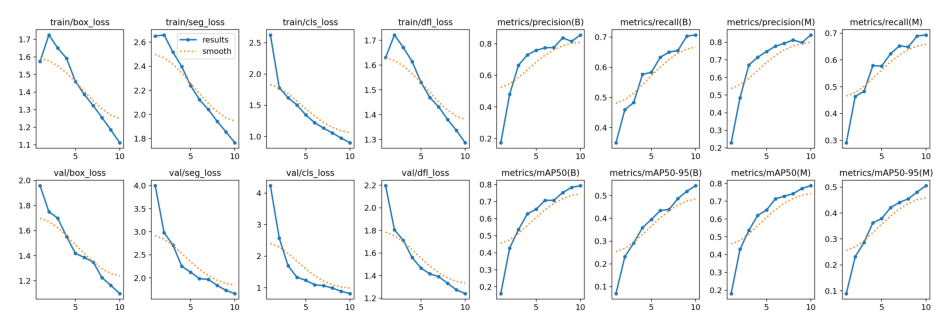

In [ ]:
# from PIL import Image

# # Memuat gambar menggunakan PIL
# image_path = "/content/runs/segment/train2/results.png"
# img = Image.open(image_path)

# # Menampilkan gambar
# plt.figure(figsize=(12, 12))
# plt.imshow(img)
# plt.axis("off")

(-0.5, 1919.5, 1919.5, -0.5)

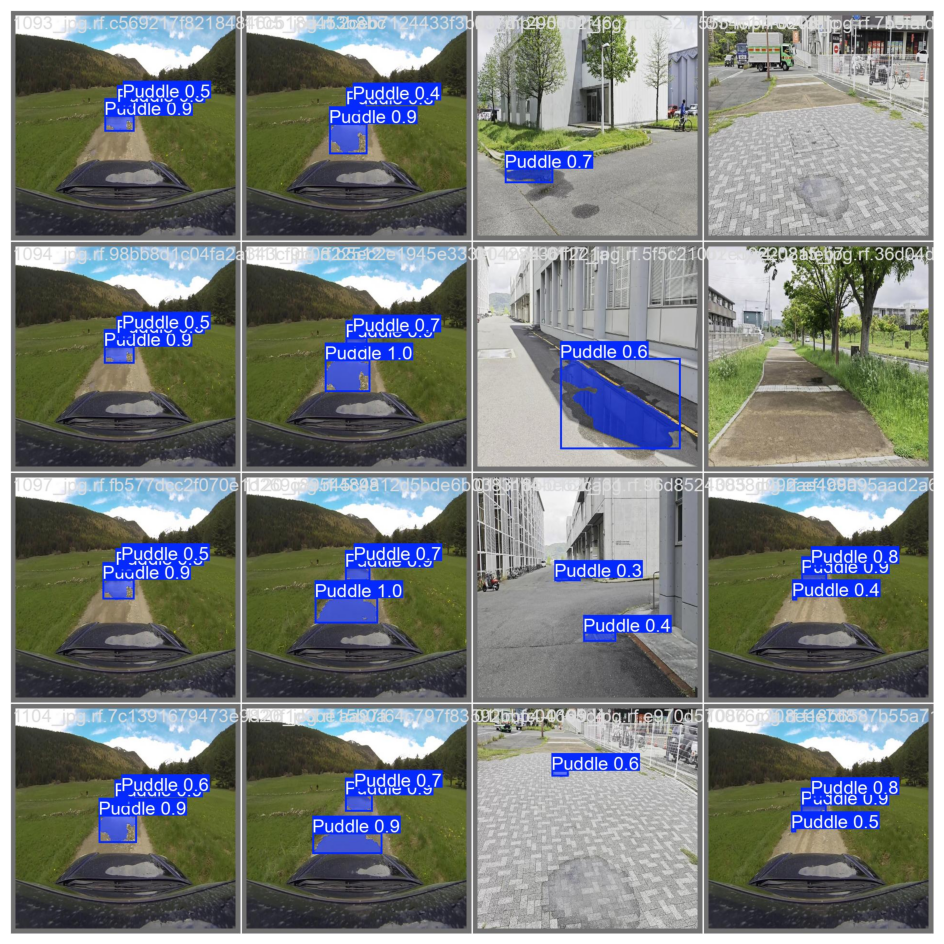

In [ ]:
# # Memuat gambar menggunakan PIL
# image_path = "/content/runs/segment/train2/val_batch1_pred.jpg"
# img = Image.open(image_path)

# # Menampilkan gambar
# plt.figure(figsize=(12, 12))
# plt.imshow(img)
# plt.axis("off")

## Prediksi Genangan

Model YOLO11s-seg

In [ ]:
results_predict_s  = modelmetrics_s("D:/carol/puddles1.jpg", save=True)
results_predict_s  = modelmetrics_s("D:/carol/puddles2.jpg", save=True)
results_predict_s = modelmetrics_s("D:/carol/puddles3.jpg", save=True)


image 1/1 D:\carol\puddles1.jpg: 224x640 1 Puddle, 36.7ms
Speed: 1.0ms preprocess, 36.7ms inference, 4.0ms postprocess per image at shape (1, 3, 224, 640)
Results saved to runs\segment\predict4

image 1/1 D:\carol\puddles2.jpg: 480x640 1 Puddle, 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict4

image 1/1 D:\carol\puddles3.jpg: 448x640 4 Puddles, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\segment\predict4


In [ ]:
from PIL import Image

# Memuat gambar menggunakan PIL
# Path ke gambar yang ingin ditampilkan
image_path = "D:/carol/runs/segment/predict4/puddles1.jpg"
img = Image.open(image_path)

# Menampilkan gambar
img.show()

In [ ]:
from PIL import Image

# Memuat gambar menggunakan PIL
# Path ke gambar yang ingin ditampilkan
image_path = "D:/carol/runs/segment/predict4/puddles2.jpg"
img = Image.open(image_path)

# Menampilkan gambar
img.show()

In [ ]:
from PIL import Image

# Memuat gambar menggunakan PIL
# Path ke gambar yang ingin ditampilkan
image_path = "D:/carol/runs/segment/predict4/puddles3.jpg"
img = Image.open(image_path)

# Menampilkan gambar
img.show()



---
> untuk melihat titik koordinat



In [ ]:
# untuk mengetahui titik koordinat
for box, mask in zip(results_predict [0].boxes, results_predict[0].masks):  # Mengakses kotak dan segmentasi untuk frame pertama
    # Mengambil koordinat kotak
    bbox = box.xyxy[0]

    # Mengambil ID kelas dan skor kepercayaan
    class_id = int(box.cls[0])
    confidence = box.conf[0]

    # Mengambil nama kelas dari model
    class_name = modelmetrics_s.names[class_id]

    # Mengambil koordinat segmentasi
    segmentation = mask.xy[0] # Misalnya, koordinat dalam format [x1, y1, x2, y2, ...]

    # Menampilkan hasil
    print("Bounding Box:", bbox)
    print("Class ID:", class_id)
    print("Confidence:", confidence)
    print("Class Name:", class_name)
    print("Segmentation Coordinates:", segmentation)

Bounding Box: tensor([ 64.1136, 153.6044, 537.2960, 317.2098], device='cuda:0')
Class ID: 0
Confidence: tensor(0.8163, device='cuda:0')
Class Name: Puddle
Segmentation Coordinates: [[     248.62      152.36]
 [     248.62      155.23]
 [     247.67      156.19]
 [      244.8      156.19]
 [     243.84      157.14]
 [     240.02      157.14]
 [     239.06       158.1]
 [     233.32       158.1]
 [     232.37      159.06]
 [     219.94      159.06]
 [     218.98      160.01]
 [     213.24      160.01]
 [     212.29      160.97]
 [     205.59      160.97]
 [     204.64      161.92]
 [     199.86      161.92]
 [      198.9      162.88]
 [     196.03      162.88]
 [     195.07      163.84]
 [     191.25      163.84]
 [     190.29      164.79]
 [     186.47      164.79]
 [     185.51      165.75]
 [     181.69      165.75]
 [     180.73      166.71]
 [     175.95      166.71]
 [     174.99      167.66]
 [     171.17      167.66]
 [     170.21      168.62]
 [     167.34      168.62]
 [     16